In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('customerService.csv')
#df.head()

### 每位客戶的所有callout時間

In [17]:
df_time = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    for j in df[df['Unique ID'] == i].reset_index().index :
        df_time.at[i, j] = df[df['Unique ID'] == i].reset_index().at[j, '資料日期']
#df_time.head()

### 每位客戶的所有callout內容

In [18]:
df_event = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    for j in df[df['Unique ID'] == i].reset_index().index :
        df_event.at[i, j] = df[df['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_event


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5%,cherry 人及美都有機會,[ECP]確認文件以掛號寄出,[ECP]0.4% IPO 美1萬3,"[ECP]電確,家管,客人說四年期債申購款已匯",[ECP]亞債人民幣10萬要求0.3%,[ECP]10萬人民幣給0.3% 下週單筆,"[ECP]ABHY ABP 人民幣3月低到期,到時可能會再加一點",[ECP]人民幣 亞高130萬,[ECP]沒信心 沒錢 IPO,"[ECP]帳號過長需修正,掛退","[ECP]電確,?有要異動指扣帳戶.",[ECP]本來想要賣4年期 有資需求,[ECP]家庭戶馬X璇319381 請我推基金給他 穩健型都可以
AA2986,"現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中...",MGM 戶號318359,"[ECP]確認表單要寄送地址,要求放二支觸控筆","[ECP]文件今天收到,還沒看,有問題會再來電,提醒儘快寄回才能參加家人推薦MGM",[ECP]推Q1,開戶文件有收到，現在來寫,女兒先不辦，現場客戶，改為兆豐，下週三下午約4:00會再來現場,[ECP]等有來101聽演講再順道過來，要改為兆豐銀行台外幣，不確定哪一天，會事前打過來給我...,NaN,NaN,NaN,NaN,NaN,NaN
AA6076,"[ECP]境外ES被退:無此使用者,客戶的兒子說少打tw,寄表單修改",[ECP]想要買回，要用錢，要全部賣,"帳上環高收都賣掉，今日來電要大俄及日本領月報,今天會寄出","[ECP]收到適性第6,7沒填出生地,,掛退,不願線上更新,經營小吃",進線自營山東火燒是面食類,[ECP]Robo RSP、單筆書面，不常上網 大俄、中國、環球、印度,[ECP] 文件有收到，請客戶寄回RSP書面，詢問中國機會的淨值,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0329,[ECP] 手機本人，人不錯，庫存為新興高收債組合，說明中國境內債，似乎有意願，但現在比較忙...,[ECP] 表示沒有收到書面的文宣，通訊地址是正確的，請我再寄一次，告知單筆20萬有零手續費...,[ECP] 7/10 14:43手機本人，告知中國境內債週三開始募集，今日16:00可以交易...,[ECP] 7/18 17:35手機終於聯繫上本人，提醒募集僅到7/19 16:00前喔，客...,[ECP] 客戶還是沒下單，再次手機說明中國境內債募集僅到下午四點，客戶推說陸股跌很多，已說...,[ECP] 10/22 17:40上午撥打客戶請我晚點撥，後續聯繫手機家電應該是公電未接，公...,[ECP] 來電IB表示擔心市場，回電手機安撫並說明，請續扣，也推ROBO，有意願參考（平日...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行","[ECP]follow 名單,有在銀行買,問和銀行差異及手續費,會再想想是不是要寄回,指扣為...",[ECP]要穩 IPO 中債會參考 已MAIL 好好 會再看,已mail 中債,[ECP]下週會寄回,[ECP]白天不方便接 請晚上打,[ECP]下周打,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA1538,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,家庭戶,娘會寄回開戶 二戶 推中國 環球,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA9122,[ECP]推Q2有扣法巴大俄，買很多,[ECP] 推中國債，推Q2,[ECP]境內外e-mail退信 信箱空間不足 轉介559 推RSP,暫不增加，推q3 已經扣很多,[ECP]在國外 Robo還沒講,[ECP]Robo已寄回12/22 D檔想要停扣，請客戶先改為一天扣款，先不要停,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA3537,邊境市場高收益債，想買月配，20萬 配息,網路上用彰銀扣，有考慮要去玉山開戶，推邊境市場月配，有人民幣不知道有多少，再看一下，如果不夠...,Miya pss,[ECP]人民幣不夠5萬，還要再去換，來不及之後再買,[ECP]文件有收到，在外面不方便，推 q3 邊境市場月配20萬,[ECP]追開戶.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA3586,"想買APHY 今日會現場辦,PASS mina,北富邦銀",Tina轉介Mina,[ECP]follow開戶,[ECP] 8/10 15:51手機本人，開戶資料有收到，但還沒時間填，會找時間填好，再討論...,"[ECP]follow開戶,客戶拒聽說在忙就掛斷,",[ECP] 9/19 17:33手機已接通後，聽到野村就又變成未接聽？然後斷線？公電未接，前...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA3176,"太太在彰銀及富邦買很多新興高組合, 現在要用自己的來電 人民幣及 台幣 要再1-2個月 保險...",[ECP]在大陸,[ECP錢都在大陸 等升值再換美元,會寄回 要6% 推亞債 台幣,[ECP]開戶ec追蹤 心情不好 說投資在我們家都虧錢 晚點再說 暫不考慮開戶,[ECP]抱怨在銀行買 新興只賺2% 真差 說明市場 推亞債 再想想,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 每位客戶的所有callout時間和相應內容

In [19]:
df_time_event = pd.concat([df_event, df_time], axis=0)
#df_time_event.count(axis=1)
df_time_event.sort_index(inplace=True)
df_time_event.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA0063,20180524 155600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0063,[ECP]泰國巴西名單 客戶說在打球 先mail 2Q優惠,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0102,20180328 151853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0102,推Q1，家庭戶,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0263,有進線問IPO.但沒有要理專回電 用mail,[ECP]IPO 美元 有機會,已開ipo edm 再mail,[ECP]可意買亞債,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0263,20180112 175257,20180123 135700,20180620 161329,20180724 175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0269,20180213 161400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0269,[ECP]KYC名單 客戶說不需要,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0305,20180906 163600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0305,[ECP]家庭戶 徐O 有問到被動原件,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 每位客戶每個月的被聯絡次數

In [20]:
df_month_times = pd.DataFrame()
for k in range(1,13):
    for i in df_time.index:
        count = 0
        for j in range(0, len(df_time.loc[i])):
            if not pd.isna(df_time.loc[i][j]):
                if df_time.loc[i][j][4:6] == str(k).zfill(2):
                        count += 1
        df_month_times.loc[i,k] = count
                                               
df_month_times.head()

,1,2,3,4,5,6,7,8,9,10,11,12
AA4372,5.0,2.0,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0
AA2986,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AA6076,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
AA0329,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0
AA3336,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0


### 每位客戶callout次數最多的那個月的通話內容
#### （index按客戶總callout次數排序）

In [21]:
df_months = pd.DataFrame()
for i in df_time.index:
    maximum=max(df_month_times.loc[i])
    for k in range(1,13):    
        if df_month_times.loc[i,k]==maximum:
            df_months.loc[i,'month value']=str(k).zfill(2)
df_months

,month value
AA4372,01
AA2986,03
AA6076,12
AA0329,07
AA3336,06
AA1538,07
AA9122,09
AA3537,07
AA3586,08
AA3176,08


In [22]:
df_callContent = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    for j in df[df['Unique ID'] == i].reset_index().index :
        if df_time.loc[i,j][4:6] == df_months.loc[i,'month value']:
            df_callContent.at[i, j] = df[df['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_callContent.head()

,0,1,2,3,4,5,6,7
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5%,cherry 人及美都有機會,[ECP]確認文件以掛號寄出,[ECP]0.4% IPO 美1萬3,"[ECP]電確,家管,客人說四年期債申購款已匯",NaN,NaN,NaN
AA2986,NaN,NaN,"[ECP]確認表單要寄送地址,要求放二支觸控筆","[ECP]文件今天收到,還沒看,有問題會再來電,提醒儘快寄回才能參加家人推薦MGM",[ECP]推Q1,開戶文件有收到，現在來寫,女兒先不辦，現場客戶，改為兆豐，下週三下午約4:00會再來現場,[ECP]等有來101聽演講再順道過來，要改為兆豐銀行台外幣，不確定哪一天，會事前打過來給我...
AA6076,NaN,NaN,NaN,NaN,進線自營山東火燒是面食類,[ECP]Robo RSP、單筆書面，不常上網 大俄、中國、環球、印度,[ECP] 文件有收到，請客戶寄回RSP書面，詢問中國機會的淨值,NaN
AA0329,NaN,[ECP] 表示沒有收到書面的文宣，通訊地址是正確的，請我再寄一次，告知單筆20萬有零手續費...,[ECP] 7/10 14:43手機本人，告知中國境內債週三開始募集，今日16:00可以交易...,[ECP] 7/18 17:35手機終於聯繫上本人，提醒募集僅到7/19 16:00前喔，客...,[ECP] 客戶還是沒下單，再次手機說明中國境內債募集僅到下午四點，客戶推說陸股跌很多，已說...,NaN,NaN,NaN
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行","[ECP]follow 名單,有在銀行買,問和銀行差異及手續費,會再想想是不是要寄回,指扣為...",[ECP]要穩 IPO 中債會參考 已MAIL 好好 會再看,已mail 中債,[ECP]下週會寄回,NaN,NaN,NaN


### 每個客戶接到的電話次數的分佈圖

In [23]:
from highcharts import Highchart
H = Highchart(width=750, height=600)

data1 = list(df['Unique ID'].value_counts().value_counts())

options = {'title': {
        'text': '每位客戶被撥打的頻率'
    },
    'xAxis': {
        'categories': list(df['Unique ID'].value_counts().value_counts().index),
        'title': {
            'text': None
        }
    },
    'yAxis': {
        'min': 0,
        'title': {
            'text': 'count',
            'align': 'high'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'tooltip': {
        'valueSuffix': ' people'
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'backgroundColor': "((Highcharts.theme && Highcharts.theme.legendBackgroundColor) || '#FFFFFF')",
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

H.add_data_set(data1, 'bar', 'frequency')

H

ModuleNotFoundError: No module named 'highcharts'

上圖可知，絕大多數客戶接電話次數為1-2次
### 查看頻率為1-2次的通話內容：

In [24]:
df_freq_less_2 = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    if df['Unique ID'].value_counts()[i] <= 2:
        df_freq_less_2 = pd.concat([df_freq_less_2, df[df['Unique ID'] == i]], ignore_index=True)
df_freq_less_2.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA3532,20180711 160528,家庭戶 爸爸 詹O煌在處理，滿20歲，一銀或台中商銀，開戶資料寄給爸爸，想買環球，RSP
1,Call Out,AA3532,20180802 184244,兒子有意見，表示先不開，請客戶再和兒子討論一下
2,Call Out,AA3184,20180529 150637,Money 電子報訂閱名單
3,Call Out,AA3184,20180611 175900,"[ECP]瞭解是否收到表單,沒空看"
4,Call Out,AA3229,20180601 101300,Money名單分配 款台外 轉介559


In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import jieba
import jieba.analyse
from collections import Counter
from matplotlib import pyplot as plt

In [26]:
stopwords = []
with open('stopwords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopwords.append(data)
        
stoplst = [' ', '\xa0']
for words in stoplst:
    stopwords.append(words)

In [27]:
with open('keywords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/pk/_rrvz8g95h5d151_18nk_59m0000gn/T/jieba.cache
Loading model cost 0.836 seconds.
Prefix dict has been built succesfully.


In [28]:
df_terms = pd.read_csv('customerService.csv')
df_terms.head()


,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA2765,20180102 141000,[ECP] 去電確認開戶文件 客戶說後來去買美元保單就不開戶了
1,Call Out,AA3910,20180102 144300,[ECP]不方說 IPO MAIL
2,Call Out,AA3167,20180102 154500,[ECP] IPO 忙 先MAIL
3,Call Out,AA2355,20180102 194359,家庭戶 媽媽說女兒不開了，因為打工收入不穩定
4,Call Out,AA2778,20180103 111132,推Q1


### 統計頻率1-2次通話內容的詞頻

In [29]:
error_lst_2 = []
terms_freq_2=[]
for i in range(len(df_freq_less_2['客戶事件描述'])):
    try:
        for j in list(jieba.cut(df_freq_less_2['客戶事件描述'][i], cut_all = False)):
            if j not in stopwords:
                terms_freq_2.append(j)
    except:
        error_lst_2.append([i, df_freq_less_2['客戶事件描述'][i]])

In [30]:
sorted(Counter(terms_freq_2).items(), key=lambda x:x[1], reverse=True)[:15]

[('Money', 136),
 ('推', 89),
 ('名單', 86),
 ('客戶', 81),
 ('退休專刊', 77),
 ('電子報訂閱名單', 72),
 ('寄送', 70),
 ('開戶', 65),
 ('分配', 59),
 ('買', 58),
 ('IPO', 38),
 ('家庭戶', 33),
 ('轉介', 33),
 ('追蹤', 33),
 ('看看', 33)]

大部分內容其實是在講：Money 電子報訂閱名單，寄送退休專刊。

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import jieba
import codecs
import jieba.posseg as pseg

In [32]:
names_freq_2 = {}          
relationships_freq_2 = {}  
lineNames_freq_2 = []  
for i in range(len(df_freq_less_2['客戶事件描述'])):
    try:
        poss = jieba.cut(df_freq_less_2['客戶事件描述'][i], cut_all = False)
        lineNames_freq_2.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_2[-1].append(w)        
            if names_freq_2.get(w) is None and w not in stopwords:    
                relationships_freq_2[w] = {}            
    except:
        pass

In [33]:
term_dic = dict()
for sentence in lineNames_freq_2:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [34]:
for i in range(len(lineNames_freq_2)):
    for term1 in term_dic:
        num = 0
        for term2 in lineNames_freq_2[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][df_freq_less_2['客戶事件描述'][i]] = num

#### Term-Document-MatriX

In [35]:
TDM_freq_less_2 = pd.DataFrame.from_dict(term_dic)
TDM_freq_less_2.head()

,家庭戶,爸爸,詹,煌,處理,滿,20,歲,一銀,或台,...,感謝,已速,單位,並解,決淨值,38,回填,給客,戶問,已買
@line好友留名單拿7-11咖啡,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"@line好友留名單拿7-11咖啡 , 都買權證，個股，無基金投資經驗，無投資興趣，還是和客戶說寄資料參考一下，",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@line好友留名單拿7-11咖啡 沒興趣，都是先生在弄，也不想了解，也不想給先生的資料，說他很忙，不想接到電話,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@line好友留名單拿7-11咖啡，,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@line好友留名單拿7-11咖啡，RSP，台幣玉山，有時也會做單筆，推環球、中國,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Co-occurrence Matrix

In [36]:
for line in lineNames_freq_2:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_2[name1].get(name2) is None:     
                relationships_freq_2[name1][name2]= 1
            else:
                relationships_freq_2[name1][name2] = relationships_freq_2[name1][name2]+ 1       
co_occur_freq_less_2 = [[name, v, w] for name, edges in relationships_freq_2.items() for v, w in edges.items() if w > 15]

In [37]:
np.random.shuffle(co_occur_freq_less_2)
temp_matrix = pd.DataFrame()
for i in co_occur_freq_less_2:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_less_2 = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_freq_less_2.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_freq_less_2.head()

,追蹤,買,留,咖啡,名單,11,寄送,退休專刊,IPO,好友,...,推,Money,分配,電子報訂閱名單,中信,客戶,開戶,ec,基金,外幣
追蹤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN
買,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,19.0,NaN
留,NaN,NaN,NaN,18.0,17.0,16.0,NaN,NaN,NaN,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
咖啡,NaN,NaN,18.0,NaN,16.0,17.0,NaN,NaN,NaN,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
名單,NaN,NaN,17.0,16.0,NaN,16.0,NaN,NaN,NaN,18.0,...,NaN,63.0,59.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN


In [38]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_freq_less_2]
co_occur_sig = []
for i in co_occur_freq_less_2:
    co_occur_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

/Users/wutiyu/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


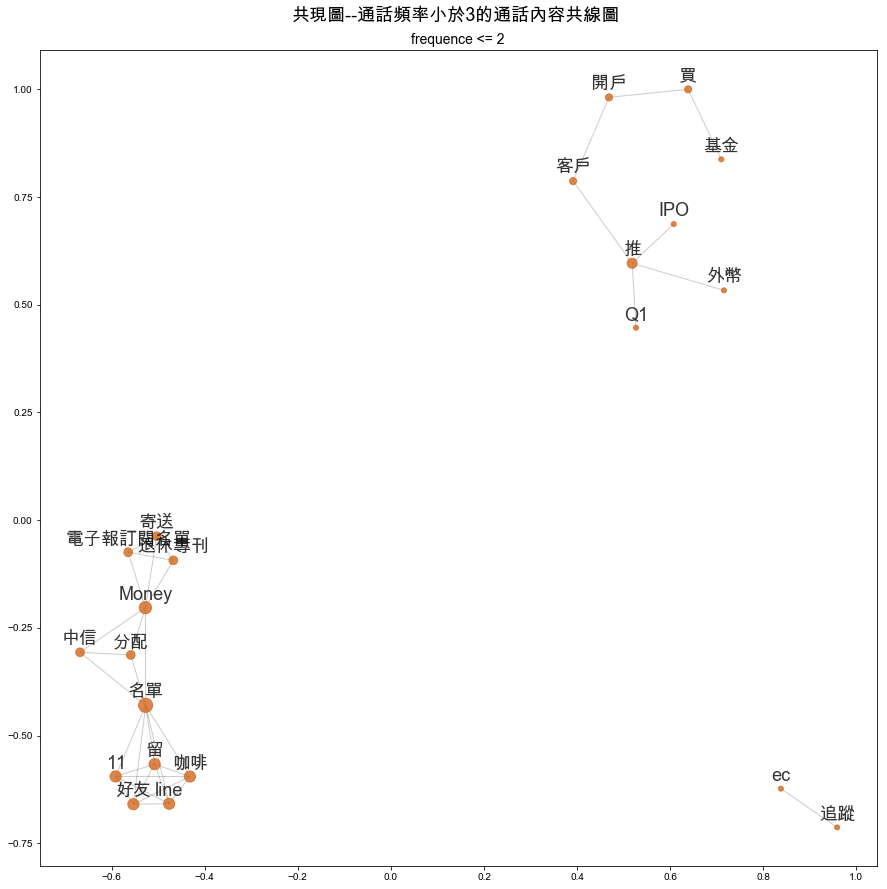

In [39]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['font.family'] = ['Arial Unicode MS']
#plt.rcParams['font.family'] ='Webdings'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.title('frequence <= 2', size = 14)
plt.suptitle('共現圖--通話頻率小於3的通話內容共線圖',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--通話頻率小於3的通話內容共線圖.png", dpi=100)
plt.show()

##### 上圖可知，callout次數小於2的通話內容分為幾類：  
<br>1.LINE留資料送咖啡的促銷活動 <br>(Line@留名單送7-11咖啡活動/Money 電子報訂閱名單/Money名單分配 中信)<br>2.寄送退休專刊<br>3.追蹤EC電子商務事宜<br>4.想開戶買基金 <br>5.客服在推Q1、推IPO、推外幣<br>6.中信分配

<br>thoughts：
<br>1.篩選callout次數小於2，但提到開戶的用戶ID，了解後續的開戶狀況，
<br>評估說callout次數較小和開戶成功之間的關係（接電話越少，就越不能成功拓展業務）
<br>2.LINE活動舉辦期間，大部分通話是沒有再進行後續聯繫的，也許可以藉此推薦產品
<br>3.客服有主動在推Q1、IPO、外幣，因為本來就不會百分百推薦成功，要看後續的銷售情況，比較客服力推的產品和其他產品的銷售情況


### 頻率4次以上通話

In [40]:
df_freq_more_5 = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    if df['Unique ID'].value_counts()[i] >= 4:
        df_freq_more_5 = pd.concat([df_freq_more_5, df[df['Unique ID'] == i]], ignore_index=True)
df_freq_more_5.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA4372,20180124 173744,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5%
1,Call Out,AA4372,20180124 182821,cherry 人及美都有機會
2,Call Out,AA4372,20180125 100100,[ECP]確認文件以掛號寄出
3,Call Out,AA4372,20180126 100400,[ECP]0.4% IPO 美1萬3
4,Call Out,AA4372,20180129 181600,"[ECP]電確,家管,客人說四年期債申購款已匯"


### 統計頻率4次以上通話內容的詞頻

In [41]:
error_lst_5 = []
terms_freq_5=[]
for i in range(len(df_freq_more_5['客戶事件描述'])):
    try:
        for j in list(jieba.cut(df_freq_more_5['客戶事件描述'][i], cut_all = False)):
            if j not in stopwords:
                terms_freq_5.append(j)
    except:
        error_lst_5.append([i, df_freq_more_5['客戶事件描述'][i]])

sorted(Counter(terms_freq_5).items(), key=lambda x:x[1], reverse=True)[:15]

[('客戶', 55),
 ('推', 46),
 ('買', 35),
 ('開戶', 30),
 ('寄回', 29),
 ('追蹤', 23),
 ('萬', 21),
 ('手機', 20),
 ('IPO', 18),
 ('10', 18),
 ('說明', 18),
 ('EC', 18),
 ('收到', 17),
 ('轉介', 17),
 ('中國', 16)]

In [42]:
names_freq_5 = {}          
relationships_freq_5 = {}  
lineNames_freq_5 = []  
for i in range(len(df_freq_more_5['客戶事件描述'])):
    try:
        poss_5 = jieba.cut(df_freq_more_5['客戶事件描述'][i], cut_all = False)
        lineNames_freq_5.append([])
        for w in poss_5:
            if w not in stopwords:
                lineNames_freq_5[-1].append(w)        
            if names_freq_5.get(w) is None and w not in stopwords:    
                relationships_freq_5[w] = {}            
    except:
        pass

In [43]:
term_dic_5 = dict()
for sentence in lineNames_freq_5:
    for term in sentence:
        if term not in term_dic_5:
            term_dic_5[term] = {}

In [44]:
for i in range(len(lineNames_freq_5)):
    for term1 in term_dic_5:
        num = 0
        for term2 in lineNames_freq_5[i]:
            if term1 == term2:
                num += 1
        term_dic_5[term1][df_freq_more_5['客戶事件描述'][i]] = num

#### TDM

In [45]:
TDM_freq_5 = pd.DataFrame.from_dict(term_dic_5)
TDM_freq_5.head()

,網路,ipo,美及,機會,線上,填,先作,一支,境內,境外,...,另要,問推薦,47,0987519955,亞洲,美國,先變,更,外核,印
10/1 10:52手機本人表示正在忙，前已建立潛在，A174660，請我晚點撥，強基金九月名單客戶,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10/18 16:37已引導完成---15:58手機本人，表示投資都是爸爸處理的，撥家裡終於找到爸爸-林O欽15754，爸爸表示目前兒子再考公職，沒有工作，所以停扣，等有工作就會扣了，覺得亞太複合高收益債券表現不好，已說明，另推十月品牌月活動，爸爸要把自己的愛爾蘭美高收不定額改為D檔，請我引導交易，後續去電家電就不通…持續連繫,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11/28 14:46來電IB表示要開戶，想要買台灣高股息，設定台新 台外幣 境內外 轉Idris,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12/12 17:47回電手機0987519955說明，境內可參考台灣高股息+環球；境外可參考天達亞洲股票+野村愛爾蘭美國高收益債，文件已寄回，但需要退件，處理中,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,1,1,0,0,0,0
12/6 16:49進線詢問多元收益平衡處理方式，建議待明年一月確認加息後表現若有3％可賣掉，亞太複合高收債待2月再評估狀況，環球定額續扣，可新增印度RSP，主動告知已寄回ROBO委任書，也可以參考，EMAIL聯絡代號備用,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
names_freq_5 = {}          
relationships_freq_5 = {}  
lineNames_freq_5 = []    

for i in range(len(df_freq_more_5['客戶事件描述'])):
    try:
        poss = jieba.cut(df_freq_more_5['客戶事件描述'][i], cut_all = False)
        lineNames_freq_5.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_5[-1].append(w)        
            if names_freq_5.get(w) is None and w not in stopwords:
                names_freq_5[w] = 0
                relationships_freq_5[w] = {}
                names_freq_5[w] += 1   
    except:
        pass

for line in lineNames_freq_5:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_5[name1].get(name2) is None:     
                relationships_freq_5[name1][name2]= 1
            else:
                relationships_freq_5[name1][name2] = relationships_freq_5[name1][name2]+ 1       
co_occur_freq_5 = [[name, v, w] for name, edges in relationships_freq_5.items() for v, w in edges.items() if w > 8]

In [47]:
np.random.shuffle(co_occur_freq_5)
temp_matrix_5 = pd.DataFrame()
for i in co_occur_freq_5:
    temp_matrix_5.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_5 = pd.DataFrame()
for i in temp_matrix_5:
    for j in temp_matrix_5:
        co_occurrence_matrix_freq_5.at[i, j] = temp_matrix_5.at[i, j]
co_occurrence_matrix_freq_5.head()

,開戶,境內,買,說明,客戶,爸爸,人民幣,手機,萬,追蹤,中國,EC,20,推,收到,想,表示,寄回
開戶,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
境內,NaN,NaN,NaN,9.0,11.0,NaN,NaN,9.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
買,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,11.0,NaN,NaN,NaN,NaN,10.0,NaN,10.0,NaN,NaN
說明,NaN,9.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
客戶,NaN,11.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,NaN,9.0,NaN,NaN,12.0


In [48]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_5 = [i[2] for i in co_occur_freq_5]
co_occur_sig_5 = []
for i in co_occur_freq_5:
    co_occur_sig_5.append([i[0], i[1], sigmoid((i[2] - np.mean(count_5))/np.std(count_5))])

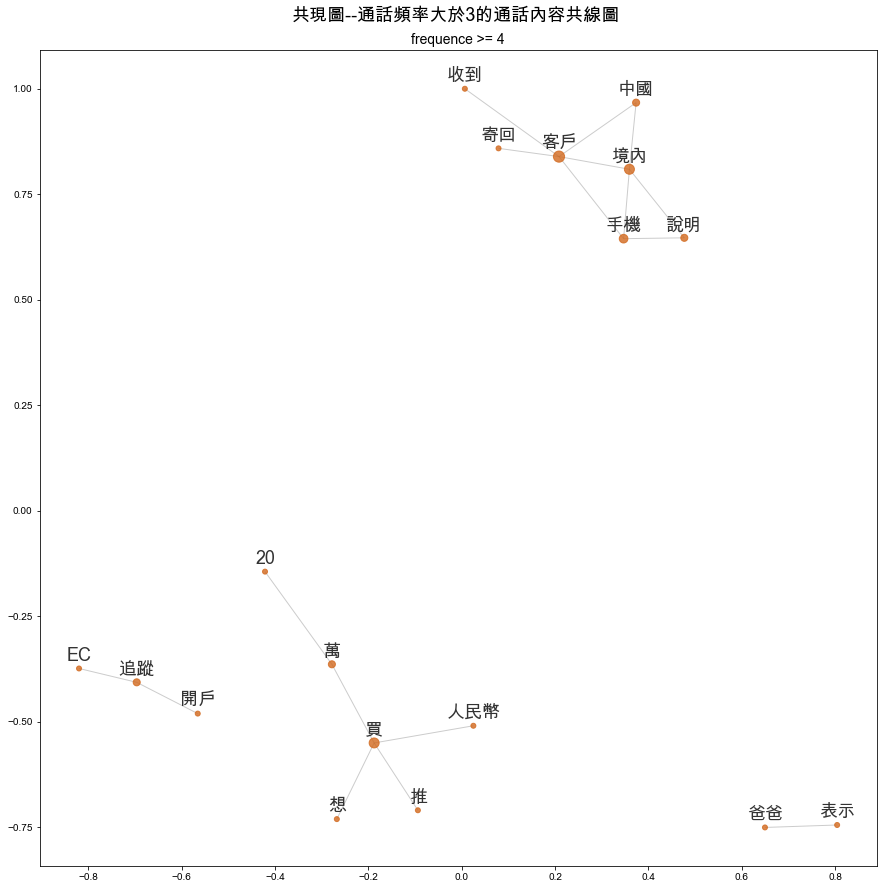

In [49]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']=['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_5)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.title('frequence >= 4', size = 14)
plt.suptitle('共現圖--通話頻率大於3的通話內容共線圖',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--通話頻率大於3的通話內容共線圖.png", dpi=100)
plt.show()

##### 上圖可知，callout次數大於4的通話內容主要分為幾類：  
<br>1.說明中國境內債 <br>2.買人民幣產品 <br>3.開戶追蹤 EC追蹤
### thoughts：野村公司的客戶群體可能有蠻多人是對中國境內債以及人民產品感興趣的




### 每個月call out次數

In [50]:
tmp_list=[]
for j in range(1,13):
    count=0
    for i in range(0,len(df['資料日期'])):
        if df['資料日期'][i][4:6]==str(j).zfill(2):
            count+=1
    tmp_list.append(count)
month_list=[x for x in range(1,len(tmp_list)+1)]        
print(tmp_list)

from highcharts import Highchart
H1 = Highchart(width=750, height=600)

data2 = tmp_list

options = {'title': {
        'text': '每月客服撥call out的頻率'
    },
    'xAxis': {
        'categories': month_list,
        'title': {
            'text': None
        }
    },
    'yAxis': {
        'min': 0,
        'title': {
            'text': 'count',
            'align': 'high'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'tooltip': {
        'valueSuffix': ' people'
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'backgroundColor': "((Highcharts.theme && Highcharts.theme.legendBackgroundColor) || '#FFFFFF')",
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H1.set_dict_options(options)

H1.add_data_set(data2, 'bar', 'frequency')

H1


[125, 60, 102, 25, 76, 273, 84, 97, 39, 30, 39, 49]


ModuleNotFoundError: No module named 'highcharts'

#### 客服日均的callout情況：四月0.8次/天，六月9.1次/天
#### 1、3、6、8月callout次數較多

In [51]:
df_june = pd.read_csv('june.csv')
df_june.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA3228,20180601 100751,Money名單分配 玉山
1,Call Out,AA4372,20180601 101100,[ECP]沒信心 沒錢 IPO
2,Call Out,AA3229,20180601 101300,Money名單分配 款台外 轉介559
3,Call Out,AA2895,20180601 101600,[ECP]不投資
4,Call Out,AA3231,20180601 101931,Money名單分配 中信


### 6月通話內容

In [52]:
error_lst_june = []
terms_freq_june=[]
for i in range(len(df_june['客戶事件描述'])):
    try:
        for j in list(jieba.cut(df_june['客戶事件描述'][i], cut_all = False)):
            if j not in stopwords:
                terms_freq_june.append(j)
    except:
        error_lst_june.append([i, df_june['客戶事件描述'][i]])

sorted(Counter(terms_freq_june).items(), key=lambda x:x[1], reverse=True)[:15]

[('Money', 113),
 ('退休專刊', 68),
 ('寄送', 60),
 ('電子報訂閱名單', 59),
 ('名單', 54),
 ('分配', 49),
 ('追蹤', 37),
 ('開戶', 23),
 ('客戶', 23),
 ('看看', 22),
 ('IPO', 21),
 ('推', 20),
 ('EC', 20),
 ('ec', 18),
 ('中債', 15)]

In [53]:
names_june = {}          
relationships_june = {}  
lineNames_june = []  
for i in range(len(df_june['客戶事件描述'])):
    try:
        poss_june = jieba.cut(df_june['客戶事件描述'][i], cut_all = False)
        lineNames_june.append([])
        for w in poss_june:
            if w not in stopwords:
                lineNames_june[-1].append(w)        
            if names_june.get(w) is None and w not in stopwords:    
                relationships_june[w] = {}            
    except:
        pass

In [54]:
term_dic_june = dict()
for sentence in lineNames_june:
    for term in sentence:
        if term not in term_dic_june:
            term_dic_june[term] = {}

In [55]:
for i in range(len(lineNames_june)):
    for term1 in term_dic_june:
        num = 0
        for term2 in lineNames_june[i]:
            if term1 == term2:
                num += 1
        term_dic_june[term1][df_june['客戶事件描述'][i]] = num

In [56]:
TDM_june = pd.DataFrame.from_dict(term_dic_june)
TDM_june.head()

,Money,名單,分配,玉山,信心,沒錢,IPO,款台,外,轉介,...,額,改扣,信用,合作社,二位,本來,4年期,有資,需求,ipox
182313 鄭O崴 家庭戶 台北富邦一本萬利，兒子想要先買回，推EC，可能會來現場，來現場不用找我，會有服務專員協助開戶,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208 娘298803廖○霞,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234090 詹O妃的先生，pass idris，客戶自己線上填寫寄回,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC追蹤 有收到 還沒看,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Idris轉介,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
names_june = {}          
relationships_june = {}  
lineNames_june = []    

for i in range(len(df_june['客戶事件描述'])):
    try:
        poss_june = jieba.cut(df_june['客戶事件描述'][i], cut_all = False)
        lineNames_june.append([])
        for w in poss_june:
            if w not in stopwords:
                lineNames_june[-1].append(w)        
            if names_june.get(w) is None and w not in stopwords:
                names_june[w] = 0
                relationships_june[w] = {}
                names_june[w] += 1   
    except:
        pass

for line in lineNames_june:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_june[name1].get(name2) is None:     
                relationships_june[name1][name2]= 1
            else:
                relationships_june[name1][name2] = relationships_june[name1][name2]+ 1       
co_occur_june = [[name, v, w] for name, edges in relationships_june.items() for v, w in edges.items() if w > 8]

In [58]:
np.random.shuffle(co_occur_june)
temp_matrix_june = pd.DataFrame()
for i in co_occur_june:
    temp_matrix_june.at[i[0], i[1]] = i[2]
co_occurrence_matrix_june = pd.DataFrame()
for i in temp_matrix_june:
    for j in temp_matrix_june:
        co_occurrence_matrix_june.at[i, j] = temp_matrix_june.at[i, j]
co_occurrence_matrix_june.head()

,Money,電子報訂閱名單,EC,分配,退休專刊,寄送,ec,開戶,追蹤,銀行,推,中信,名單,中國債
Money,NaN,59.0,NaN,49.0,60.0,60.0,NaN,11.0,NaN,10.0,NaN,13.0,53.0,NaN
電子報訂閱名單,59.0,NaN,NaN,NaN,59.0,60.0,NaN,10.0,NaN,9.0,NaN,NaN,NaN,NaN
EC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
分配,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,49.0,NaN
退休專刊,60.0,59.0,NaN,NaN,NaN,60.0,NaN,10.0,NaN,9.0,NaN,NaN,NaN,NaN


In [59]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_june = [i[2] for i in co_occur_june]
co_occur_sig_june = []
for i in co_occur_june:
    co_occur_sig_june.append([i[0], i[1], sigmoid((i[2] - np.mean(count_june))/np.std(count_june))])

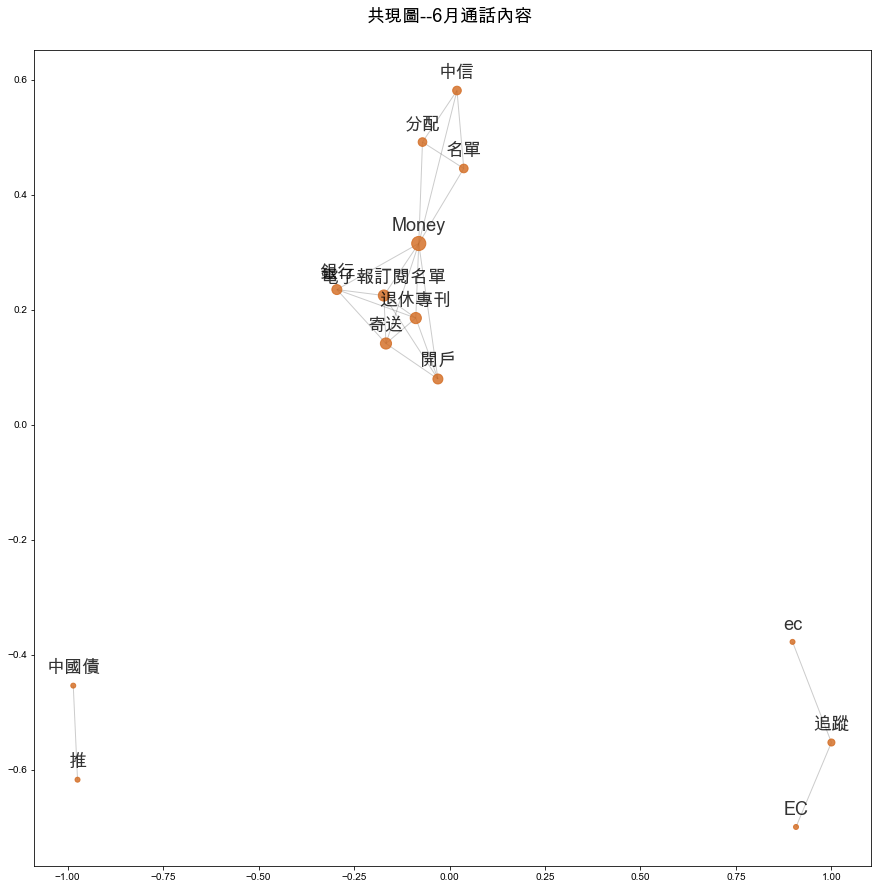

In [60]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   用来正常显示中文标签
plt.rcParams['font.family'] = ['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_june)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
#plt.title('fr', size = 14)
plt.suptitle('共現圖--6月通話內容',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--6月通話內容.png", dpi=100)
plt.show()

##### 上圖可知，callout次數最多的六月，它的通話內容主要分為：  
<br>1.推中國債 <br>2.EC追蹤
<br>3.寄送Money 電子報訂閱名單、退休專刊、開戶文件
<br>4.中信分配
 
#### 了解中國債的後續銷售情況，確認中國債是否為暢銷產品

觀察聯絡最頻繁的客戶每個月聯絡內容之分析比較

客戶名單

In [62]:
testdata_0 = pd.read_excel('客服資料含交易與基本資料_20190418.xlsx', sheetname=0)
testdata_0

/Users/wutiyu/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Unique ID
0,AA2778
1,AA5706
2,AA2844
3,AA2849
4,AA2850
5,AA0809
6,AA2855
7,AA2856
8,AA2858
9,AA2833


客戶聯繫紀錄

In [63]:
testdata_1 = pd.read_excel('客服資料含交易與基本資料_20190418.xlsx', sheetname=1)
testdata_1

,Unique ID,編號,第1次通話紀錄,第2次通話紀錄,第3次通話紀錄,第4次通話紀錄,第5次通話紀錄,第6次通話紀錄,第7次通話紀錄,第8次通話紀錄
0,AA2778,無開戶,推Q1^,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AA5706,181030,成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AA2844,無開戶,家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬^,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AA2849,無開戶,想買全球短期收益 覺得美金計價有6%收益很讚,推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論^,NaN,NaN,NaN,NaN,NaN,NaN
4,AA2850,11701,王O如 未滿14 轉介559,轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印^,NaN,NaN,NaN,NaN,NaN,NaN
5,AA0809,60001,家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1^,[ECP]反應配息帳號資料異動在2/21收到信，過年前寄出，為什麼過年後才收到，導致太太收到...,NaN,NaN,NaN,NaN,NaN,NaN
6,AA2855,無開戶,推Q1，朋友 288874 李's介紹，台幣台新無外幣，要特別看能源，NN(L)能源，買股票...,推Q1，新戶 想買台運，有持有個股，開戶文件有收到，但是還沒空寫，請客戶先寄回 ^,NaN,NaN,NaN,NaN,NaN,NaN
7,AA2856,無開戶,RSP，推境內外開戶，台外幣國泰，以為IPO四年債可以用每個月來扣，要零手續費，所以改要買RSP^,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AA2858,無開戶,推Q1，317305劉O滿介紹的朋友，在南山人壽上班，想要買亞債，想要加入公司的line，寄...,文件有收到，還沒看，客戶表示在忙，有需要再和我們說,NaN,NaN,NaN,NaN,NaN,NaN
9,AA2833,無開戶,IPO四年期，寄書面至通訊，美元,"Stock Q 看到4年期,10:22進線詢問,PASS M",要和先生討論一下，先生比較沒有興趣 推IPO四年期^,NaN,NaN,NaN,NaN,NaN


In [64]:
acc_con = []
for i in range(len(testdata_1['Unique ID'])):
    acc_con.append([testdata_1['Unique ID'][i]])
    acc_con[i].append(testdata_1['編號'][i])
    if(type(testdata_1['第8次通話紀錄'][i]) != float):
        acc_con[i].append(8)
    elif(type(testdata_1['第7次通話紀錄'][i]) != float):
        acc_con[i].append(7)
    elif(type(testdata_1['第6次通話紀錄'][i]) != float):
        acc_con[i].append(6)
    elif(type(testdata_1['第5次通話紀錄'][i]) != float):
        acc_con[i].append(5)
    elif(type(testdata_1['第4次通話紀錄'][i]) != float):
        acc_con[i].append(4)
    elif(type(testdata_1['第3次通話紀錄'][i]) != float):
        acc_con[i].append(3)
    elif(type(testdata_1['第2次通話紀錄'][i]) != float):
        acc_con[i].append(2)
    elif(type(testdata_1['第1次通話紀錄'][i]) != float):
        acc_con[i].append(1)
acc_con

[['AA2778', '無開戶', 1],
 ['AA5706', 181030, 1],
 ['AA2844', '無開戶', 1],
 ['AA2849', '無開戶', 2],
 ['AA2850', 11701, 2],
 ['AA0809', 60001, 2],
 ['AA2855', '無開戶', 2],
 ['AA2856', '無開戶', 1],
 ['AA2858', '無開戶', 2],
 ['AA2833', '無開戶', 3],
 ['AA2861', '無開戶', 2],
 ['AA2846', '無開戶', 1],
 ['AA2879', '無開戶', 1],
 ['AA2883', '無開戶', 1],
 ['AA2884', 234364, 2],
 ['AA2890', '無開戶', 2],
 ['AA2885', '無開戶', 1],
 ['AA2895', '無開戶', 4],
 ['AA2896', '無開戶', 2],
 ['AA2917', '無開戶', 1],
 ['AA2941', '無開戶', 2],
 ['AA2082', '無開戶', 1],
 ['AA2943', '無開戶', 3],
 ['AA8978', 318090, 3],
 ['AA8077', 136408, 2],
 ['AA2956', '無開戶', 2],
 ['AA1049', 312291, 4],
 ['AA2970', '無開戶', 2],
 ['AA2968', '無開戶', 4],
 ['AA3002', '無開戶', 1],
 ['AA8303', '無開戶', 3],
 ['AA3014', '無開戶', 1],
 ['AA3029', '無開戶', 1],
 ['AA3041', '無開戶', 1],
 ['AA3044', '無開戶', 2],
 ['AA3046', '無開戶', 2],
 ['AA3052', '無開戶', 3],
 ['AA3947', 42308, 1],
 ['AA2986', '無開戶', 8],
 ['AA1935', 148302, 2],
 ['AA9132', 305254, 2],
 ['AA0557', 5974, 3],
 ['AA5617', 1332, 3],
 ['AA0

有開戶成功的

In [65]:
have_acc = []
for i in acc_con:
    if(i[1] != '無開戶'):
        have_acc.append(i)
have_acc

[['AA5706', 181030, 1],
 ['AA2850', 11701, 2],
 ['AA0809', 60001, 2],
 ['AA2884', 234364, 2],
 ['AA8978', 318090, 3],
 ['AA8077', 136408, 2],
 ['AA1049', 312291, 4],
 ['AA3947', 42308, 1],
 ['AA1935', 148302, 2],
 ['AA9132', 305254, 2],
 ['AA0557', 5974, 3],
 ['AA5617', 1332, 3],
 ['AA0102', 216543, 1],
 ['AA3139', 178683, 1],
 ['AA4255', 296923, 1],
 ['AA8267', 316671, 1],
 ['AA1353', 311281, 2],
 ['AA9107', 101150, 2],
 ['AA8041', 225492, 1],
 ['AA5297', 257959, 4],
 ['AA9875', 98368, 1],
 ['AA8857', 318258, 1],
 ['AA6008', 14331, 1],
 ['AA3880', 254047, 1],
 ['AA5576', 317653, 3],
 ['AA9122', 2126, 6],
 ['AA3685', 311033, 1],
 ['AA3621', 313627, 1],
 ['AA4200', 247951, 1],
 ['AA0329', 304709, 7]]

聯絡只有一次就開戶的人，其談話內容為何

In [66]:
one_talk = []
for i in range(len(testdata_1['Unique ID'])):
    for j in range(len(have_acc)):
        if(have_acc[j][2] == 1 and have_acc[j][0] == testdata_1['Unique ID'][i]):
            one_talk.append(testdata_1['第1次通話紀錄'][i])
one_talk

['成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^',
 '推Q1，自己看，不需要\xa0^',
 '推Q1，家庭戶\xa0^',
 '178683 林O山 家庭戶推EC，富邦台外幣,文件寄給先生^',
 '推 q2 申請全品RSP 0%優惠券一張，家庭戶^',
 '[ECP]在上班，晚上再打，推IPO中國債^',
 '[ECP]推IPO中國債，沒錢，沒信心想把NN環高收賣掉，建議再等到七月再看^',
 '推IPO中國債，有需要申請0%優惠券再和我說，email^',
 '推Q3，推中小 家庭戶\xa0^',
 '[ECP]詢問開戶文件是否收到，目前還沒有看到，推Q3，推IPO金融債^',
 '[ECP]推Q3，好好好 推E科技^',
 '9/26 10:47太太311033手機本人，品牌RSP中，主動問到想要新增AI相關的基金，推Robo，待資料出來在提供給客戶，另外先生想開戶，設定台北富邦，推薦環球，email月報Push^',
 '[ECP] 9/26 14:40手機本人，無庫存無RSP，推說沒再看啦，推薦環球+中國機會+大俄羅斯，EMAIL推Q3^',
 '[ECP] 手機仍轉語音，新馬RSP中，EMAIL推契約^']

聯絡一次就開戶的談話內容共現圖

In [68]:
names_freq_1 = {}          
relationships_freq_1 = {}  
lineNames_freq_1 = []  
for i in range(len(one_talk)):
    try:
        poss_1 = jieba.cut(one_talk[i], cut_all = False)
        lineNames_freq_1.append([])
        for w in poss_1:
            if w not in stopwords:
                lineNames_freq_1[-1].append(w)        
            if names_freq_1.get(w) is None and w not in stopwords:
                relationships_freq_1[w] = {}
    except:
        pass

In [69]:
term_dic_1 = dict()
for sentence in lineNames_freq_1:
    for term in sentence:
        if term not in term_dic_1:
            term_dic_1[term] = {}

In [70]:
for i in range(len(lineNames_freq_1)):
    for term1 in term_dic_1:
        num = 0
        for term2 in lineNames_freq_1[i]:
            if term1 == term2:
                num += 1
        term_dic_1[term1][one_talk[i]] = num

In [71]:
TDM_freq_1 = pd.DataFrame.from_dict(term_dic_1)
TDM_freq_1

,成年,家庭戶,推,IPO,四年期,人民幣,約,台幣,30,萬,...,+,中國,機會,大俄,羅,斯,MAIL,轉語音,新馬,推契約
"178683 林O山 家庭戶推EC，富邦台外幣,文件寄給先生^",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9/26 10:47太太311033手機本人，品牌RSP中，主動問到想要新增AI相關的基金，推Robo，待資料出來在提供給客戶，另外先生想開戶，設定台北富邦，推薦環球，email月報Push^,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 9/26 14:40手機本人，無庫存無RSP，推說沒再看啦，推薦環球+中國機會+大俄羅斯，EMAIL推Q3^,0,0,1,0,0,0,0,0,0,0,...,2,1,1,1,1,1,1,0,0,0
[ECP] 手機仍轉語音，新馬RSP中，EMAIL推契約^,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
[ECP]在上班，晚上再打，推IPO中國債^,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]推IPO中國債，沒錢，沒信心想把NN環高收賣掉，建議再等到七月再看^,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]推Q3，好好好 推E科技^,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]詢問開戶文件是否收到，目前還沒有看到，推Q3，推IPO金融債^,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
推 q2 申請全品RSP 0%優惠券一張，家庭戶^,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
names_freq_1 = {}          
relationships_freq_1 = {}  
lineNames_freq_1 = []    

for i in range(len(one_talk)):
    try:
        poss = jieba.cut(one_talk[i], cut_all = False)
        lineNames_freq_1.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_1[-1].append(w)        
            if names_freq_1.get(w) is None and w not in stopwords:
                names_freq_1[w] = 0
                relationships_freq_1[w] = {}
                names_freq_1[w] += 1   
    except:
        pass


for line in lineNames_freq_1:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_1[name1].get(name2) is None:     
                relationships_freq_1[name1][name2]= 1
            else:
                relationships_freq_1[name1][name2] = relationships_freq_1[name1][name2]+ 1       
co_occur_freq_1 = [[name, v, w] for name, edges in relationships_freq_1.items() for v, w in edges.items() if w >= 2]

In [73]:
np.random.shuffle(co_occur_freq_1)
temp_matrix_1 = pd.DataFrame()
for i in co_occur_freq_1:
    temp_matrix_1.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_1 = pd.DataFrame()
for i in temp_matrix_1:
    for j in temp_matrix_1:
        co_occurrence_matrix_freq_1.at[i, j] = temp_matrix_1.at[i, j]
co_occurrence_matrix_freq_1

,環球,推薦,^,推,0%,+,優惠券,MAIL,e,推說,...,想,開戶文件,40,是否,金融債,目前,斯,看到,無庫存,機會
環球,NaN,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
推薦,2.0,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
^,2.0,2.0,NaN,16.0,2.0,2.0,2.0,2.0,2.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
推,2.0,2.0,16.0,NaN,2.0,2.0,2.0,NaN,2.0,NaN,...,2.0,2.0,NaN,2.0,2.0,2.0,NaN,2.0,NaN,NaN
0%,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+,2.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,2.0,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0
優惠券,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAIL,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
推說,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_1 = [i[2] for i in co_occur_freq_1]
co_occur_sig_1 = []
for i in co_occur_freq_1:
    co_occur_sig_1.append([i[0], i[1], sigmoid((i[2] - np.mean(count_1))/np.std(count_1))])

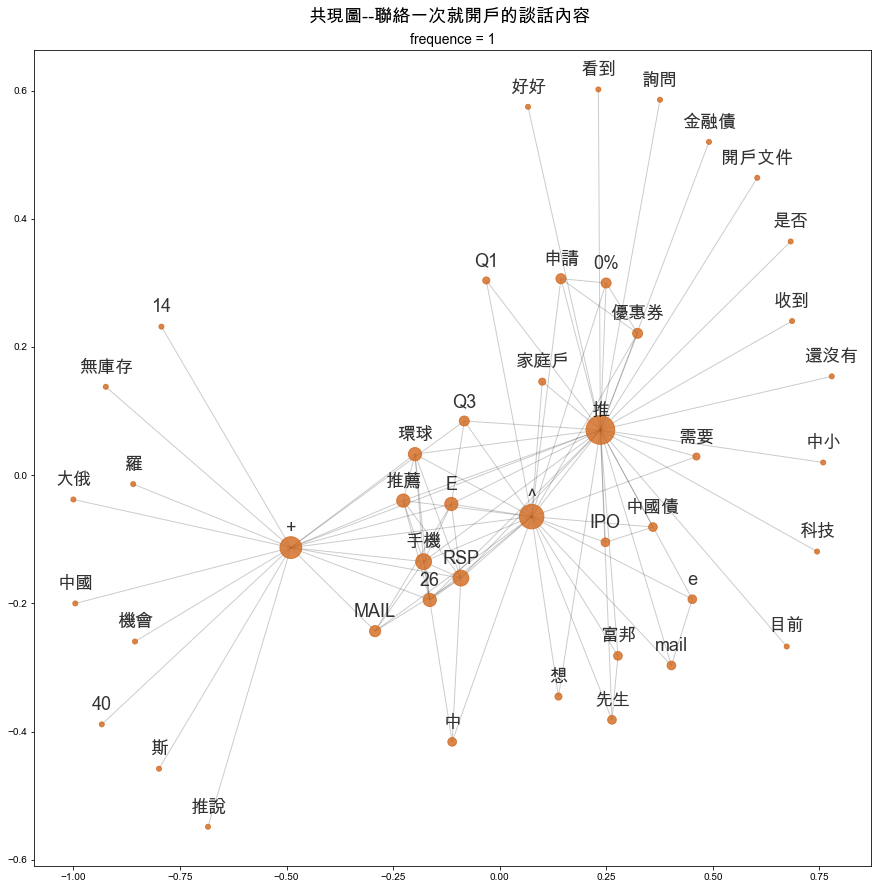

In [75]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']=['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_1)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.title('frequence = 1', size = 14)
plt.suptitle('共現圖--聯絡一次就開戶的談話內容',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--聯絡一次就開戶的談話內容.png", dpi=100)
plt.show()

沒有開戶的

In [76]:
no_acc = []
for i in acc_con:
    if(i[1] == '無開戶'):
        no_acc.append(i)
no_acc

[['AA2778', '無開戶', 1],
 ['AA2844', '無開戶', 1],
 ['AA2849', '無開戶', 2],
 ['AA2855', '無開戶', 2],
 ['AA2856', '無開戶', 1],
 ['AA2858', '無開戶', 2],
 ['AA2833', '無開戶', 3],
 ['AA2861', '無開戶', 2],
 ['AA2846', '無開戶', 1],
 ['AA2879', '無開戶', 1],
 ['AA2883', '無開戶', 1],
 ['AA2890', '無開戶', 2],
 ['AA2885', '無開戶', 1],
 ['AA2895', '無開戶', 4],
 ['AA2896', '無開戶', 2],
 ['AA2917', '無開戶', 1],
 ['AA2941', '無開戶', 2],
 ['AA2082', '無開戶', 1],
 ['AA2943', '無開戶', 3],
 ['AA2956', '無開戶', 2],
 ['AA2970', '無開戶', 2],
 ['AA2968', '無開戶', 4],
 ['AA3002', '無開戶', 1],
 ['AA8303', '無開戶', 3],
 ['AA3014', '無開戶', 1],
 ['AA3029', '無開戶', 1],
 ['AA3041', '無開戶', 1],
 ['AA3044', '無開戶', 2],
 ['AA3046', '無開戶', 2],
 ['AA3052', '無開戶', 3],
 ['AA2986', '無開戶', 8],
 ['AA3119', '無開戶', 2],
 ['AA3171', '無開戶', 2],
 ['AA3176', '無開戶', 6],
 ['AA3170', '無開戶', 4],
 ['AA3497', '無開戶', 3],
 ['AA3506', '無開戶', 1],
 ['AA3522', '無開戶', 1],
 ['AA3537', '無開戶', 6],
 ['AA3488', '無開戶', 3],
 ['AA3404', '無開戶', 6],
 ['AA3474', '無開戶', 5],
 ['AA3577', '無開戶', 2],
 ['AA3588',

聯絡三次以上卻沒開戶的人，其談話內容

In [77]:
three_more_talk = []
for i in range(len(testdata_1['Unique ID'])):
    for j in range(len(no_acc)):
        if(no_acc[j][2] >= 3 and no_acc[j][0] == testdata_1['Unique ID'][i]):
            for k in range(1, no_acc[j][2]+1):
                three_more_talk.append(testdata_1['第'+str(k)+'次通話紀錄'][i])
three_more_talk

['IPO四年期，寄書面至通訊，美元',
 'Stock Q 看到4年期,10:22進線詢問,PASS M\xa0',
 '要和先生討論一下，先生比較沒有興趣 推IPO四年期^',
 'i轉介 美元\xa0 ipo 第一天經理費 扣1.5%',
 '推IPO 208^',
 '有告知可以去收開戶',
 '[ECP]不投資',
 'Line@留名單送7-11咖啡活動，推Q1，中信，pass idris^',
 '559',
 '[ECP]正在吃東西不方便，文件還沒有去收，請客戶留意一下',
 '[ECP]@line好友留名單拿7-11咖啡',
 '想買債，想買相對低，手上沒有，推NN新興債/APHY，台幣台銀/外幣中信，推Q1^',
 'M PASS\xa0',
 '[ECP]客戶說沒有推薦基金,怎麼寫開戶,,應該是先參考基金再決定是否有想要申購的,有告知公司產品線非常完整',
 'LINE好友 在銀行買NN環高有抱怨績效不好\xa0 有作中A股 單筆套RSP有打平, 推 Q1 OK^',
 '[ECP]EC追蹤 通話中 晚點聯絡',
 '[ECP]EC追蹤 將野村設定拒接來電',
 'LINE好友/基富通/ 推環球有機會 有說RSP 0有中^',
 '[ECP]有機會 講很久\xa0 有心動 中國\xa0 /在基富通下單筆一次最近不敢買',
 '[ECP]追開戶擔心美股會下修.',
 '現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中信/富邦/台新都有，再看要用哪一家',
 'MGM 戶號318359',
 '[ECP]確認表單要寄送地址,要求放二支觸控筆',
 '[ECP]文件今天收到,還沒看,有問題會再來電,提醒儘快寄回才能參加家人推薦MGM',
 '[ECP]推Q1^',
 '開戶文件有收到，現在來寫',
 '女兒先不辦，現場客戶，改為兆豐，下週三下午約4:00會再來現場',
 '[ECP]等有來101聽演講再順道過來，要改為兆豐銀行台外幣，不確定哪一天，會事前打過來給我，有和客戶說若沒辦法協助她開戶，現在有專人服務她',
 '太太在彰銀及富邦買很多新興高組合, 現在要用自己的來電 人民幣及 台幣 要再1-2個月 保險解約才會買 推亞債^',
 '[ECP]在大陸',
 '[ECP錢都在大陸 等升值再換美元\xa0'

聯絡三次以上卻沒開戶的談話共現圖

In [78]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []  
for i in range(len(three_more_talk)):
    try:
        poss_3 = jieba.cut(three_more_talk[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss_3:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                relationships_freq_3[w] = {}
    except:
        pass

In [79]:
term_dic_3 = dict()
for sentence in lineNames_freq_3:
    for term in sentence:
        if term not in term_dic_3:
            term_dic_3[term] = {}

In [80]:
for i in range(len(lineNames_freq_3)):
    for term1 in term_dic_3:
        num = 0
        for term2 in lineNames_freq_3[i]:
            if term1 == term2:
                num += 1
        term_dic_3[term1][three_more_talk[i]] = num

In [81]:
TDM_freq_3 = pd.DataFrame.from_dict(term_dic_3)
TDM_freq_3

,IPO,四年期,寄書面,通訊,美元,Stock,Q,看到,4年期,10,...,元大,扣款,全國性,及款,附給,工作,不定期,明年,Robo,併
208 娘298803廖○霞,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IPO四年期，寄書面至通訊，美元,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"LINE好友 在銀行買NN環高有抱怨績效不好 有作中A股 單筆套RSP有打平, 推 Q1 OK^",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINE好友/基富通/ 推環球有機會 有說RSP 0有中^,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Line@留名單送7-11咖啡活動，推Q1，中信，pass idris^,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M PASS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGM 戶號318359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miya pss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Money 電子報訂閱名單,同意寄開戶表單",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []    

for i in range(len(three_more_talk)):
    try:
        poss = jieba.cut(three_more_talk[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                names_freq_3[w] = 0
                relationships_freq_3[w] = {}
                names_freq_3[w] += 1   
    except:
        pass

for line in lineNames_freq_3:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_3[name1].get(name2) is None:     
                relationships_freq_3[name1][name2]= 1
            else:
                relationships_freq_3[name1][name2] = relationships_freq_3[name1][name2]+ 1       
co_occur_freq_3 = [[name, v, w] for name, edges in relationships_freq_3.items() for v, w in edges.items() if w > 4]

In [83]:
np.random.shuffle(co_occur_freq_3)
temp_matrix_3 = pd.DataFrame()
for i in co_occur_freq_3:
    temp_matrix_3.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_3 = pd.DataFrame()
for i in temp_matrix_3:
    for j in temp_matrix_3:
        co_occurrence_matrix_freq_3.at[i, j] = temp_matrix_3.at[i, j]
co_occurrence_matrix_freq_3

,寄回,開戶,推,盡快,客戶,台幣,^,永豐,追蹤,Q1,...,公司,中信,Q3,亞債,買,中國,外幣,轉介,收到,月
寄回,NaN,NaN,7.0,NaN,6.0,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
開戶,NaN,NaN,6.0,NaN,5.0,NaN,6.0,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
推,7.0,6.0,NaN,NaN,8.0,7.0,24.0,NaN,NaN,5.0,...,NaN,5.0,8.0,6.0,10.0,NaN,5.0,5.0,NaN,5.0
盡快,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
客戶,6.0,5.0,8.0,5.0,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
台幣,NaN,NaN,7.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
^,6.0,6.0,24.0,NaN,6.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
永豐,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
追蹤,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q1,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_3 = [i[2] for i in co_occur_freq_3]
co_occur_sig_3 = []
for i in co_occur_freq_3:
    co_occur_sig_3.append([i[0], i[1], sigmoid((i[2] - np.mean(count_3))/np.std(count_3))])

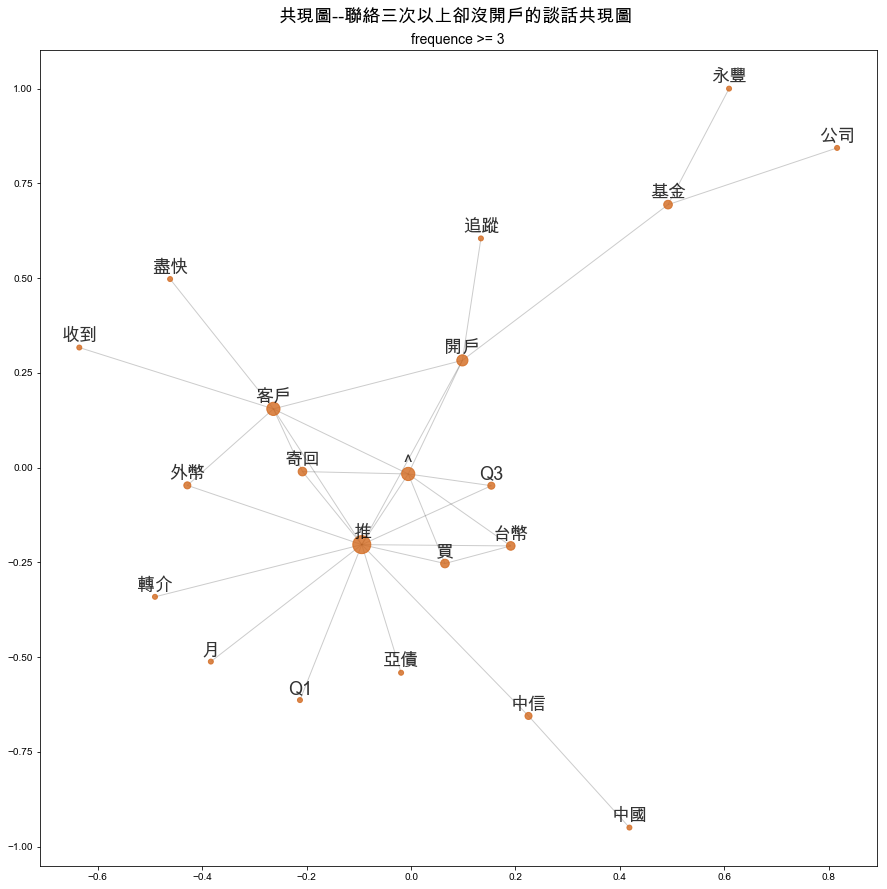

In [85]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']=['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_3)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.title('frequence >= 3', size = 14)
plt.suptitle('共現圖--聯絡三次以上卻沒開戶的談話共現圖',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--聯絡三次以上卻沒開戶的談話共現圖.png", dpi=100)
plt.show()

交易資料

In [86]:
testdata_4 = pd.read_excel('客服資料含交易與基本資料_20190418.xlsx', sheetname=4)
testdata_4

,Unique ID,編號,基金簡稱,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
0,AA9107,101150,NN (L) 投資級公司債基金X股美元(月配息),15285.3,15383.7,15396.6,15285.0,15053.1,14927.7,14746.5,14631.3,14634.6,4847.7,NaN,NaN
1,AA9107,101150,NN (L) 新興市場債券基金X股美元(月配息),15238.8,15341.4,15370.5,15343.8,15082.5,15982.2,14713.5,14627.7,14631.3,9737.1,9724.8,9722.4
2,AA9107,101150,NN (L) 環球高收益基金X股美元(月配息),15309.9,15367.5,15386.7,15273.9,15061.8,14955.0,14705.1,14619.3,14625.0,4858.8,NaN,NaN
3,AA9107,101150,安本標準 - 世界股票基金 A 累積 美元,15259.5,15332.4,15377.4,15334.2,15079.5,14970.3,14701.8,14616.3,14634.9,14571.9,14573.7,14597.7
4,AA9107,101150,安本標準 - 亞洲小型公司基金 A 累積 美元,15259.2,15331.2,15376.8,15333.9,15080.1,14970.6,14700.6,14617.5,14634.9,15540.3,15547.8,14597.7
5,AA9107,101150,安本標準 - 新興市場債券基金 A 月配息,15267.0,15350.1,15378.0,15283.8,15090.0,10923.0,14696.7,14628.3,15611.1,14556.3,16512.9,17518.5
6,AA9107,101150,野村中小基金-累積類型,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,7000.0,8000.0,8000.0,7000.0
7,AA9107,101150,野村全球生技醫療基金,9000.0,9000.0,9000.0,9000.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AA9107,101150,野村亞太複合高收益債基金-月配型新臺幣計價,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN
9,AA9107,101150,野村亞太複合高收益債基金-累積型新臺幣計價,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0,9000.0,3000.0,NaN,NaN


聯絡次數在四次以上的客戶，有真正交易的紀錄有哪些

In [87]:
ca = []
for i in acc_con:
    if(i[2] >= 4):
        ca.append([i[0], i[2]])
ct = []
lis_c = -1
for i in range(len(testdata_4)):
    for j in range(len(ca)):
        if(ca[j][0] == testdata_4['Unique ID'][i]):
            lis_c += 1
            ct.append([testdata_4['Unique ID'][i], ca[j][1], testdata_4['基金簡稱'][i]])
            for k in range(1,13):
                if(k <= 9):
                    ct[lis_c].append(testdata_4['20180'+str(k)][i])
                else:
                    ct[lis_c].append(testdata_4['2018'+str(k)][i])
ct

[['AA5297',
  4,
  '野村新興收益傘型基金之中國境內新興債券基金-累積類型新臺幣計?',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  200000.0,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['AA0329',
  7,
  '野村新興高收益債組合基金-累積型',
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0],
 ['AA1049',
  4,
  '野村 e科技基金',
  nan,
  3000.0,
  3000.0,
  3000.0,
  4000.0,
  4000.0,
  4000.0,
  24000.0,
  64000.0,
  128000.0,
  16000.0,
  16000.0],
 ['AA1049',
  4,
  '野村中小基金-累積類型',
  6000.0,
  9000.0,
  6000.0,
  6000.0,
  3000.0,
  3000.0,
  3000.0,
  3000.0,
  6000.0,
  45000.0,
  6000.0,
  6000.0],
 ['AA1049',
  4,
  '野村中國機會基金',
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  12000.0,
  12000.0,
  12000.0,
  12000.0,
  15000.0],
 ['AA1049',
  4,
  '野村巴西證券投資信託基金',
  9000.0,
  9000.0,
  9000.0,
  9000.0,
  28000.0,
  84000.0,
  21000.0,
  42000.0,
  21000.0,
  18000.0,
  18000.0,
  18000.0],
 ['AA1049',
  4,
  '野村泰國基金',
  3000.0,
  6000.0,
  6000.0,
  600

聯絡次數在四次以下的客戶，有真正交易的紀錄有哪些

In [88]:
ca = []
for i in acc_con:
    if(i[2] < 4):
        ca.append([i[0], i[2]])
ct = []
lis_c = -1
for i in range(len(testdata_4)):
    for j in range(len(ca)):
        if(ca[j][0] == testdata_4['Unique ID'][i]):
            lis_c += 1
            ct.append([testdata_4['Unique ID'][i], ca[j][1], testdata_4['基金簡稱'][i]])
            for k in range(1,13):
                if(k <= 9):
                    ct[lis_c].append(testdata_4['20180'+str(k)][i])
                else:
                    ct[lis_c].append(testdata_4['2018'+str(k)][i])
ct

[['AA9107',
  2,
  'NN (L) 投資級公司債基金X股美元(月配息)',
  15285.299999999999,
  15383.699999999999,
  15396.6,
  15285.0,
  15053.099999999999,
  14927.699999999999,
  14746.5,
  14631.299999999999,
  14634.6,
  4847.6999999999998,
  nan,
  nan],
 ['AA9107',
  2,
  'NN (L) 新興市場債券基金X股美元(月配息)',
  15238.799999999999,
  15341.4,
  15370.5,
  15343.799999999999,
  15082.5,
  15982.200000000001,
  14713.5,
  14627.699999999999,
  14631.299999999999,
  9737.1000000000004,
  9724.8000000000011,
  9722.3999999999996],
 ['AA9107',
  2,
  'NN (L) 環球高收益基金X股美元(月配息)',
  15309.9,
  15367.5,
  15386.699999999999,
  15273.9,
  15061.799999999999,
  14955.0,
  14705.1,
  14619.299999999999,
  14625.0,
  4858.8000000000002,
  nan,
  nan],
 ['AA9107',
  2,
  '安本標準 - 世界股票基金 A 累積 美元',
  15259.5,
  15332.4,
  15377.400000000001,
  15334.199999999999,
  15079.5,
  14970.299999999999,
  14701.799999999999,
  14616.299999999999,
  14634.9,
  14571.900000000001,
  14573.700000000001,
  14597.699999999999],
 ['AA9107',
  

In [89]:
cus_acc = []
for i in range(len(df['Unique ID'].value_counts())):
    if(df['Unique ID'].value_counts()[i] >= 4):
        cus_acc.append([df['Unique ID'].value_counts().index[i], df['Unique ID'].value_counts()[i]])

cus_tran = []
lis_c = -1
for i in range(len(testdata_4)):
    for j in range(len(cus_acc)):
        if(cus_acc[j][0] == testdata_4['Unique ID'][i]):
            lis_c += 1
            cus_tran.append([testdata_4['Unique ID'][i], testdata_4['Unique ID'].value_counts().values[lis_c], testdata_4['基金簡稱'][i]])
            for k in range(1,13):
                if(k <= 9):
                    cus_tran[lis_c].append(testdata_4['20180'+str(k)][i])
                else:
                    cus_tran[lis_c].append(testdata_4['2018'+str(k)][i])
cus_tran

[['AA5297',
  20,
  '野村新興收益傘型基金之中國境內新興債券基金-累積類型新臺幣計?',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  200000.0,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['AA0329',
  11,
  '野村新興高收益債組合基金-累積型',
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0],
 ['AA1049',
  9,
  '野村 e科技基金',
  nan,
  3000.0,
  3000.0,
  3000.0,
  4000.0,
  4000.0,
  4000.0,
  24000.0,
  64000.0,
  128000.0,
  16000.0,
  16000.0],
 ['AA1049',
  7,
  '野村中小基金-累積類型',
  6000.0,
  9000.0,
  6000.0,
  6000.0,
  3000.0,
  3000.0,
  3000.0,
  3000.0,
  6000.0,
  45000.0,
  6000.0,
  6000.0],
 ['AA1049',
  7,
  '野村中國機會基金',
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  6000.0,
  12000.0,
  12000.0,
  12000.0,
  12000.0,
  15000.0],
 ['AA1049',
  4,
  '野村巴西證券投資信託基金',
  9000.0,
  9000.0,
  9000.0,
  9000.0,
  28000.0,
  84000.0,
  21000.0,
  42000.0,
  21000.0,
  18000.0,
  18000.0,
  18000.0],
 ['AA1049',
  4,
  '野村泰國基金',
  3000.0,
  6000.0,
  6000.0,
  6

In [90]:
# cus_acc = []
# for i in range(len(df['Unique ID'].value_counts())):
#     if(df['Unique ID'].value_counts()[i] < 4):
#         cus_acc.append([df['Unique ID'].value_counts().index[i], df['Unique ID'].value_counts()[i]])

# cus_tran = []
# lis_c = -1
# for i in range(len(testdata_4)):
#     for j in range(len(cus_acc)):
#         if(cus_acc[j][0] == testdata_4['Unique ID'][i]):
#             lis_c += 1
#             cus_tran.append([testdata_4['Unique ID'][i], testdata_4['Unique ID'].value_counts().values[lis_c], testdata_4['基金簡稱'][i]])
#             for k in range(1,13):
#                 if(k <= 9):
#                     cus_tran[lis_c].append(testdata_4['20180'+str(k)][i])
#                 else:
#                     cus_tran[lis_c].append(testdata_4['2018'+str(k)][i])
# cus_tran

開戶且有交易(話術內容之共現圖)

In [91]:
have_acc_tra = []
temp_flag = True
for i in range(len(have_acc)):
    for j in range(len(testdata_4)):
        if(have_acc[i][0] == testdata_4['Unique ID'][j]):
            for k in range(len(have_acc_tra)):
                if(have_acc_tra[k] == have_acc[i][0]):
                    temp_flag = False
            if(temp_flag):
                have_acc_tra.append(have_acc[i][0])
            temp_flag = True
have_acc_tra

['AA5706',
 'AA0809',
 'AA8978',
 'AA8077',
 'AA1049',
 'AA3947',
 'AA1935',
 'AA9132',
 'AA0557',
 'AA0102',
 'AA3139',
 'AA9107',
 'AA8041',
 'AA5297',
 'AA9875',
 'AA8857',
 'AA3880',
 'AA4200',
 'AA0329']

In [92]:
import math
com_have_acc_tra = []

for i in range(len(testdata_1['Unique ID'])):
    for j in range(len(have_acc_tra)):
        if(have_acc_tra[j] == testdata_1['Unique ID'][i]):
            for k in range(1, 9):
                if(type(testdata_1['第'+str(k)+'次通話紀錄'][i]) == type('str')):
                    com_have_acc_tra.append(testdata_1['第'+str(k)+'次通話紀錄'][i])
com_have_acc_tra

['成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^',
 '家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1^',
 '[ECP]反應配息帳號資料異動在2/21收到信，過年前寄出，為什麼過年後才收到，導致太太收到10元匯費。不高興不想講就掛電話了',
 '家庭戶 推Q1，新春活動^',
 '推q2 家庭戶 都是太太操作',
 '[ECP]推IPO中國債 沒興趣 \xa0^',
 '[ECP]之前來現場買MI 人民幣，有配出來息是人民幣，想再買MI人民幣，若有需要會來現場，推中國、環球。@line好友拿7-11咖啡 新春活動^',
 '多元收益人民幣73000書面，3/8去匯款，之後還有一筆人民幣，再考慮再轉到這裡，推亞太收益多重資產',
 '不買單筆，推環球，RSP^',
 '家庭戶 有五戶，想買中東非，申請D檔優惠券0%各一張，推Q2',
 '[ECP]要股票，不要債券，邊境市場高收益主權債也不要，波動愈大愈好',
 '[ECP]家庭戶 Robo\xa0',
 '推Q1，自己看，不需要\xa0^',
 '推Q1，推環球、爭取一張D檔優惠券可以把大俄羅斯恢復扣款^',
 '[ECP]建議D檔投資法可以恢復環球、大俄享有0%，Q3有優惠',
 '環高收買很多，想要轉換，推亞債，3/22再回撥，看Fed開會的會後聲明，再回電劉太太。推環球^',
 '家庭戶 劉太太在處理，推IPO中國債還沒講到^',
 '[ECP]觀望，比較建議，巴西及大俄羅斯可以D檔恢復扣款，推環球也可以D檔恢復扣款^',
 '推Q3，生技及巴西請客戶恢復D檔扣款，亞債及aMI、金融債^',
 '[ECP]不急 Robo問卷有興趣 紅利500點 日誌一本/70歲以上',
 '推Q1，家庭戶\xa0^',
 '178683 林O山 家庭戶推EC，富邦台外幣,文件寄給先生^',
 '[ECP]再寄一次，看一下資料再說，推IPO中國債^',
 '[ECP]由於系統異常 ，導致您收到下單失敗的通知信，請你忽略此通知信，本公司會重新寄發正確的通知信給您',
 '[ECP]推IPO中國債，沒錢，沒信心想把NN環高收賣掉，建議再等到七月再看^',
 '[ECP]建立時間:2018/4/30 下午 04:29:01 問題內容:最近查自己所擁有的基金，無法看淨值

In [93]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []  
for i in range(len(com_have_acc_tra)):
    try:
        poss_3 = jieba.cut(com_have_acc_tra[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss_3:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                relationships_freq_3[w] = {}
    except:
        pass

In [94]:
term_dic_3 = dict()
for sentence in lineNames_freq_3:
    for term in sentence:
        if term not in term_dic_3:
            term_dic_3[term] = {}

In [95]:
for i in range(len(lineNames_freq_3)):
    for term1 in term_dic_3:
        num = 0
        for term2 in lineNames_freq_3[i]:
            if term1 == term2:
                num += 1
        term_dic_3[term1][com_have_acc_tra[i]] = num

In [96]:
TDM_freq_3 = pd.DataFrame.from_dict(term_dic_3)
TDM_freq_3

,成年,家庭戶,推,IPO,四年期,人民幣,約,台幣,30,萬,...,請續,扣,ROBO,參考,平日,方便,傍晚,中午,12,左右
"178683 林O山 家庭戶推EC，富邦台外幣,文件寄給先生^",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 10/22 17:40上午撥打客戶請我晚點撥，後續聯繫手機家電應該是公電未接，公電應該是家電，接通就掛電，有境外EC，EMAIL推十月品牌月活動試試看，境內僅有新興高收債組合RSP，也已買回大部份^,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 7/10 14:43手機本人，告知中國境內債週三開始募集，今日16:00可以交易，記得點選優惠券，前三天下單紅利點數Double,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 7/18 17:35手機終於聯繫上本人，提醒募集僅到7/19 16:00前喔，客戶OK會評估,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 來電IB表示擔心市場，回電手機安撫並說明，請續扣，也推ROBO，有意願參考（平日聯繫方便是傍晚17:30後與中午12:30左右）,0,0,1,0,0,0,0,0,2,0,...,1,1,1,1,1,1,1,1,1,1
[ECP] 客戶還是沒下單，再次手機說明中國境內債募集僅到下午四點，客戶推說陸股跌很多，已說明中國境內債低波動優勢，客戶說有空再說啦,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 手機仍轉語音，新馬RSP中，EMAIL推契約^,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 手機本人，人不錯，庫存為新興高收債組合，說明中國境內債，似乎有意願，但現在比較忙，主動請我五點後在Call 17:55手機本人說明中國境內債，說話有點急，但似乎對產品相當有興趣，郵寄書面文宣並告知20萬以上有零手續費優惠，待追蹤金額,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
[ECP] 表示沒有收到書面的文宣，通訊地址是正確的，請我再寄一次，告知單筆20萬有零手續費，意願仍高，先登記優惠券，再提醒下單,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]不急 Robo問卷有興趣 紅利500點 日誌一本/70歲以上,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []    

for i in range(len(com_have_acc_tra)):
    try:
        poss = jieba.cut(com_have_acc_tra[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                names_freq_3[w] = 0
                relationships_freq_3[w] = {}
                names_freq_3[w] += 1   
    except:
        pass

for line in lineNames_freq_3:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_3[name1].get(name2) is None:     
                relationships_freq_3[name1][name2]= 1
            else:
                relationships_freq_3[name1][name2] = relationships_freq_3[name1][name2]+ 1       
co_occur_freq_3 = [[name, v, w] for name, edges in relationships_freq_3.items() for v, w in edges.items() if w > 4]

In [98]:
np.random.shuffle(co_occur_freq_3)
temp_matrix_3 = pd.DataFrame()
for i in co_occur_freq_3:
    temp_matrix_3.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_3 = pd.DataFrame()
for i in temp_matrix_3:
    for j in temp_matrix_3:
        co_occurrence_matrix_freq_3.at[i, j] = temp_matrix_3.at[i, j]
co_occurrence_matrix_freq_3

,債,檔,復,家庭戶,^,恢,說明,扣款,中國,人民幣,...,中國債,客戶,境內,D,手機,現場,買,通知,MI,收到
債,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,...,NaN,NaN,6.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
檔,NaN,NaN,7.0,NaN,NaN,7.0,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
復,NaN,7.0,NaN,NaN,NaN,7.0,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
家庭戶,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
^,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
恢,NaN,7.0,7.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
說明,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,6.0,8.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
扣款,NaN,6.0,6.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
中國,6.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,NaN,8.0,9.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
人民幣,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,6.0,NaN


In [99]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_3 = [i[2] for i in co_occur_freq_3]
co_occur_sig_3 = []
for i in co_occur_freq_3:
    co_occur_sig_3.append([i[0], i[1], sigmoid((i[2] - np.mean(count_3))/np.std(count_3))])

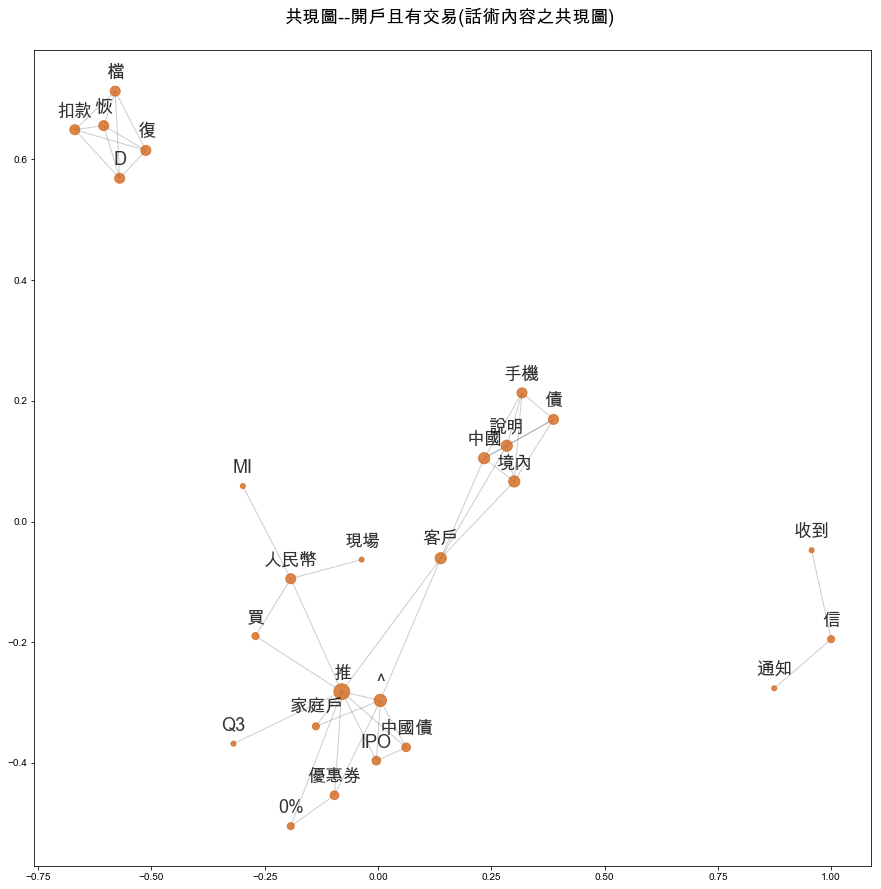

In [100]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']=['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_3)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.suptitle('共現圖--開戶且有交易(話術內容之共現圖)',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--開戶且有交易(話術內容之共現圖).png", dpi=100)
plt.show()

開戶但未交易

In [101]:
have_acc_not_tra = []
temp_flag = True
for i in range(len(have_acc)):
    for j in range(len(testdata_4)):
        if(have_acc[i][0] == testdata_4['Unique ID'][j]):
            temp_flag = False
    if(temp_flag):
        have_acc_not_tra.append(have_acc[i][0])
    temp_flag = True
have_acc_not_tra

['AA2850',
 'AA2884',
 'AA5617',
 'AA4255',
 'AA8267',
 'AA1353',
 'AA6008',
 'AA5576',
 'AA9122',
 'AA3685',
 'AA3621']

In [102]:
import math
com_have_acc_not_tra = []

for i in range(len(testdata_1['Unique ID'])):
    for j in range(len(have_acc_not_tra)):
        if(have_acc_not_tra[j] == testdata_1['Unique ID'][i]):
            for k in range(1, 9):
                if(type(testdata_1['第'+str(k)+'次通話紀錄'][i]) == type('str')):
                    com_have_acc_not_tra.append(testdata_1['第'+str(k)+'次通話紀錄'][i])
com_have_acc_not_tra

['王O如 未滿14 轉介559\xa0',
 '轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印^',
 '戶號234364的小孩.娘來電,未滿20',
 '轉介-tina，推Q1^',
 '[ECP]客戶在忙出貨，推Q1，mail 太太在處理^',
 '[ECP]現在沒有要增加',
 '[ECP]太太在處理，Robo\xa0 還沒有看到信',
 '推 q2 申請全品RSP 0%優惠券一張，家庭戶^',
 '[ECP]在上班，晚上再打，推IPO中國債^',
 '[ECP]推ipo中國債，只有台幣，mail^',
 '推IPO中國債+邊境市場債，請客戶記得點優惠券，客戶說再看看^',
 '[ECP]詢問開戶文件是否收到，目前還沒有看到，推Q3，推IPO金融債^',
 '[ECP]有機會扣 E科 RSP 有推D\xa0 先改指扣^',
 '[ECP]問內扣手續費',
 '[ECP]市場分析\xa0 中巴俄 環 亞債 n新債',
 '[ECP]推Q2有扣法巴大俄，買很多',
 '[ECP] 推中國債，推Q2',
 '[ECP]境內外e-mail退信 信箱空間不足 轉介559 推RSP^',
 '暫不增加，推q3 已經扣很多',
 '[ECP]在國外 Robo還沒講',
 '[ECP]Robo已寄回12/22 D檔想要停扣，請客戶先改為一天扣款，先不要停',
 '9/26 10:47太太311033手機本人，品牌RSP中，主動問到想要新增AI相關的基金，推Robo，待資料出來在提供給客戶，另外先生想開戶，設定台北富邦，推薦環球，email月報Push^',
 '[ECP] 9/26 14:40手機本人，無庫存無RSP，推說沒再看啦，推薦環球+中國機會+大俄羅斯，EMAIL推Q3^']

In [103]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []  
for i in range(len(com_have_acc_not_tra)):
    try:
        poss_3 = jieba.cut(com_have_acc_not_tra[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss_3:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                relationships_freq_3[w] = {}
    except:
        pass

In [104]:
term_dic_3 = dict()
for sentence in lineNames_freq_3:
    for term in sentence:
        if term not in term_dic_3:
            term_dic_3[term] = {}

In [105]:
for i in range(len(lineNames_freq_3)):
    for term1 in term_dic_3:
        num = 0
        for term2 in lineNames_freq_3[i]:
            if term1 == term2:
                num += 1
        term_dic_3[term1][com_have_acc_not_tra[i]] = num

In [106]:
TDM_freq_3 = pd.DataFrame.from_dict(term_dic_3)
TDM_freq_3

,王,未滿,14,轉介,559,idris,推,Q1,新戶,先辦,...,月,報,Push,40,無庫存,推說,中國,羅,斯,MAIL
9/26 10:47太太311033手機本人，品牌RSP中，主動問到想要新增AI相關的基金，推Robo，待資料出來在提供給客戶，另外先生想開戶，設定台北富邦，推薦環球，email月報Push^,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,0
[ECP] 9/26 14:40手機本人，無庫存無RSP，推說沒再看啦，推薦環球+中國機會+大俄羅斯，EMAIL推Q3^,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,1,1,1
[ECP] 推中國債，推Q2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]Robo已寄回12/22 D檔想要停扣，請客戶先改為一天扣款，先不要停,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]問內扣手續費,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]在上班，晚上再打，推IPO中國債^,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]在國外 Robo還沒講,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]境內外e-mail退信 信箱空間不足 轉介559 推RSP^,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]太太在處理，Robo 還沒有看到信,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP]客戶在忙出貨，推Q1，mail 太太在處理^,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []    

for i in range(len(com_have_acc_not_tra)):
    try:
        poss = jieba.cut(com_have_acc_not_tra[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                names_freq_3[w] = 0
                relationships_freq_3[w] = {}
                names_freq_3[w] += 1   
    except:
        pass

for line in lineNames_freq_3:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_3[name1].get(name2) is None:     
                relationships_freq_3[name1][name2]= 1
            else:
                relationships_freq_3[name1][name2] = relationships_freq_3[name1][name2]+ 1       
co_occur_freq_3 = [[name, v, w] for name, edges in relationships_freq_3.items() for v, w in edges.items() if w > 2]

In [108]:
np.random.shuffle(co_occur_freq_3)
temp_matrix_3 = pd.DataFrame()
for i in co_occur_freq_3:
    temp_matrix_3.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_3 = pd.DataFrame()
for i in temp_matrix_3:
    for j in temp_matrix_3:
        co_occurrence_matrix_freq_3.at[i, j] = temp_matrix_3.at[i, j]
co_occurrence_matrix_freq_3

,IPO,推,客戶,Q2,Q1,^,mail,RSP,中國債,轉介,+,Q3
IPO,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
推,4.0,NaN,4.0,3.0,3.0,13.0,4.0,5.0,5.0,3.0,3.0,3.0
客戶,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Q2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q1,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
^,3.0,13.0,4.0,NaN,3.0,NaN,4.0,5.0,3.0,3.0,3.0,NaN
mail,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
RSP,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
中國債,NaN,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
轉介,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_3 = [i[2] for i in co_occur_freq_3]
co_occur_sig_3 = []
for i in co_occur_freq_3:
    co_occur_sig_3.append([i[0], i[1], sigmoid((i[2] - np.mean(count_3))/np.std(count_3))])

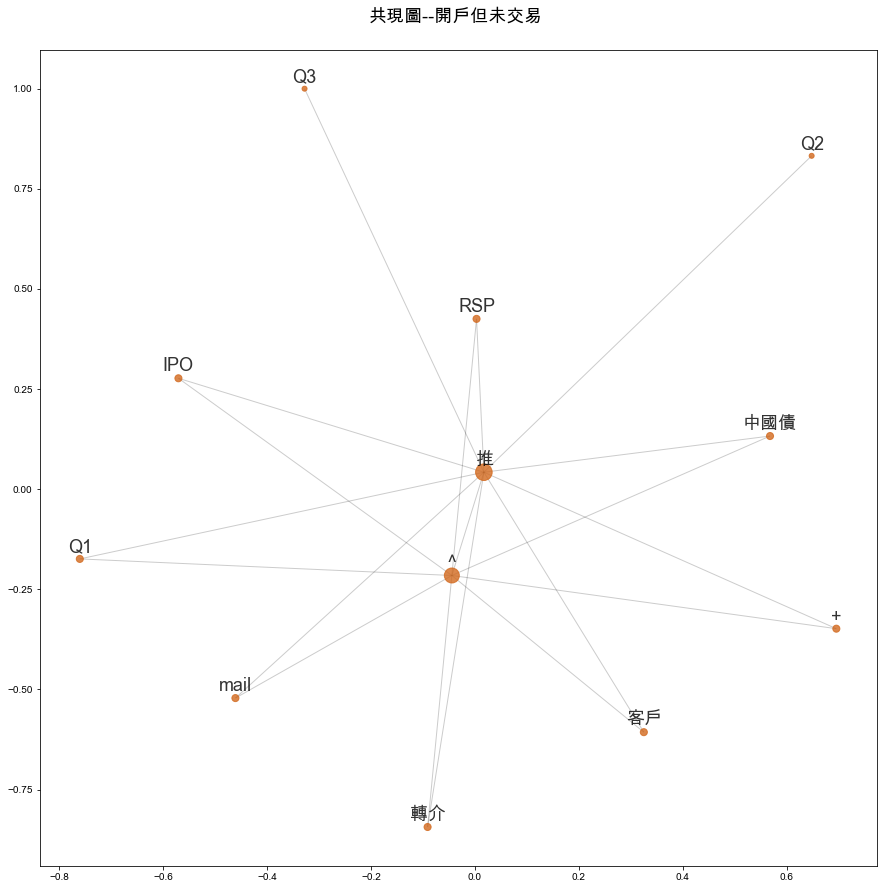

In [110]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']=['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_3)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.suptitle('共現圖--開戶但未交易',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--開戶但未交易.png", dpi=100)
plt.show()

從「未開戶」到「已開戶」

In [111]:
crea_acc = []
for i in range(len(testdata_1['Unique ID'])):
    for j in range(len(have_acc)):
        if(have_acc[j][0] == testdata_1['Unique ID'][i]):
            for k in range(1, 9):
                if(type(testdata_1['第'+str(k)+'次通話紀錄'][i]) == type('str')):
                    crea_acc.append(testdata_1['第'+str(k)+'次通話紀錄'][i])
crea_acc

['成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^',
 '王O如 未滿14 轉介559\xa0',
 '轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印^',
 '家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1^',
 '[ECP]反應配息帳號資料異動在2/21收到信，過年前寄出，為什麼過年後才收到，導致太太收到10元匯費。不高興不想講就掛電話了',
 '戶號234364的小孩.娘來電,未滿20',
 '轉介-tina，推Q1^',
 '家庭戶 推Q1，新春活動^',
 '推q2 家庭戶 都是太太操作',
 '[ECP]推IPO中國債 沒興趣 \xa0^',
 '[ECP]之前來現場買MI 人民幣，有配出來息是人民幣，想再買MI人民幣，若有需要會來現場，推中國、環球。@line好友拿7-11咖啡 新春活動^',
 '多元收益人民幣73000書面，3/8去匯款，之後還有一筆人民幣，再考慮再轉到這裡，推亞太收益多重資產',
 '不買單筆，推環球，RSP^',
 '家庭戶 有五戶，想買中東非，申請D檔優惠券0%各一張，推Q2',
 '[ECP]要股票，不要債券，邊境市場高收益主權債也不要，波動愈大愈好',
 '[ECP]家庭戶 Robo\xa0',
 '推Q1，自己看，不需要\xa0^',
 '推Q1，推環球、爭取一張D檔優惠券可以把大俄羅斯恢復扣款^',
 '[ECP]建議D檔投資法可以恢復環球、大俄享有0%，Q3有優惠',
 '環高收買很多，想要轉換，推亞債，3/22再回撥，看Fed開會的會後聲明，再回電劉太太。推環球^',
 '家庭戶 劉太太在處理，推IPO中國債還沒講到^',
 '[ECP]觀望，比較建議，巴西及大俄羅斯可以D檔恢復扣款，推環球也可以D檔恢復扣款^',
 '推Q3，生技及巴西請客戶恢復D檔扣款，亞債及aMI、金融債^',
 '[ECP]不急 Robo問卷有興趣 紅利500點 日誌一本/70歲以上',
 '[ECP]客戶在忙出貨，推Q1，mail 太太在處理^',
 '[ECP]現在沒有要增加',
 '[ECP]太太在處理，Robo\xa0 還沒有看到信',
 '推Q1，家庭戶\xa0^',
 '178683 林O山 家庭戶推EC，富邦台外幣,文件寄給先生^',

In [112]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []  
for i in range(len(crea_acc)):
    try:
        poss_3 = jieba.cut(crea_acc[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss_3:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                relationships_freq_3[w] = {}
    except:
        pass

In [113]:
term_dic_3 = dict()
for sentence in lineNames_freq_3:
    for term in sentence:
        if term not in term_dic_3:
            term_dic_3[term] = {}

In [114]:
for i in range(len(lineNames_freq_3)):
    for term1 in term_dic_3:
        num = 0
        for term2 in lineNames_freq_3[i]:
            if term1 == term2:
                num += 1
        term_dic_3[term1][crea_acc[i]] = num

In [115]:
TDM_freq_3 = pd.DataFrame.from_dict(term_dic_3)
TDM_freq_3

,成年,家庭戶,推,IPO,四年期,人民幣,約,台幣,30,萬,...,擔心,安撫並,請續,ROBO,參考,平日,方便,傍晚,中午,左右
"178683 林O山 家庭戶推EC，富邦台外幣,文件寄給先生^",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9/26 10:47太太311033手機本人，品牌RSP中，主動問到想要新增AI相關的基金，推Robo，待資料出來在提供給客戶，另外先生想開戶，設定台北富邦，推薦環球，email月報Push^,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 10/22 17:40上午撥打客戶請我晚點撥，後續聯繫手機家電應該是公電未接，公電應該是家電，接通就掛電，有境外EC，EMAIL推十月品牌月活動試試看，境內僅有新興高收債組合RSP，也已買回大部份^,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 7/10 14:43手機本人，告知中國境內債週三開始募集，今日16:00可以交易，記得點選優惠券，前三天下單紅利點數Double,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 7/18 17:35手機終於聯繫上本人，提醒募集僅到7/19 16:00前喔，客戶OK會評估,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 9/26 14:40手機本人，無庫存無RSP，推說沒再看啦，推薦環球+中國機會+大俄羅斯，EMAIL推Q3^,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 來電IB表示擔心市場，回電手機安撫並說明，請續扣，也推ROBO，有意願參考（平日聯繫方便是傍晚17:30後與中午12:30左右）,0,0,1,0,0,0,0,0,2,0,...,1,1,1,1,1,1,1,1,1,1
[ECP] 客戶還是沒下單，再次手機說明中國境內債募集僅到下午四點，客戶推說陸股跌很多，已說明中國境內債低波動優勢，客戶說有空再說啦,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 手機仍轉語音，新馬RSP中，EMAIL推契約^,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[ECP] 手機本人，人不錯，庫存為新興高收債組合，說明中國境內債，似乎有意願，但現在比較忙，主動請我五點後在Call 17:55手機本人說明中國境內債，說話有點急，但似乎對產品相當有興趣，郵寄書面文宣並告知20萬以上有零手續費優惠，待追蹤金額,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [116]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []    

for i in range(len(crea_acc)):
    try:
        poss = jieba.cut(crea_acc[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                names_freq_3[w] = 0
                relationships_freq_3[w] = {}
                names_freq_3[w] += 1   
    except:
        pass

for line in lineNames_freq_3:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_3[name1].get(name2) is None:     
                relationships_freq_3[name1][name2]= 1
            else:
                relationships_freq_3[name1][name2] = relationships_freq_3[name1][name2]+ 1       
co_occur_freq_3 = [[name, v, w] for name, edges in relationships_freq_3.items() for v, w in edges.items() if w > 2]

In [117]:
np.random.shuffle(co_occur_freq_3)
temp_matrix_3 = pd.DataFrame()
for i in co_occur_freq_3:
    temp_matrix_3.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_3 = pd.DataFrame()
for i in temp_matrix_3:
    for j in temp_matrix_3:
        co_occurrence_matrix_freq_3.at[i, j] = temp_matrix_3.at[i, j]
co_occurrence_matrix_freq_3

,很多,人民幣,MAIL,大俄,收到,D,需要,撥,境內,金融債,...,年前,組合,10,好友,過年,信給,30,不想,21,若有
很多,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
人民幣,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0
MAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
大俄,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
收到,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,3.0,NaN,3.0,NaN,NaN,3.0,3.0,NaN
D,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
需要,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
撥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
境內,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
金融債,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_3 = [i[2] for i in co_occur_freq_3]
co_occur_sig_3 = []
for i in co_occur_freq_3:
    co_occur_sig_3.append([i[0], i[1], sigmoid((i[2] - np.mean(count_3))/np.std(count_3))])

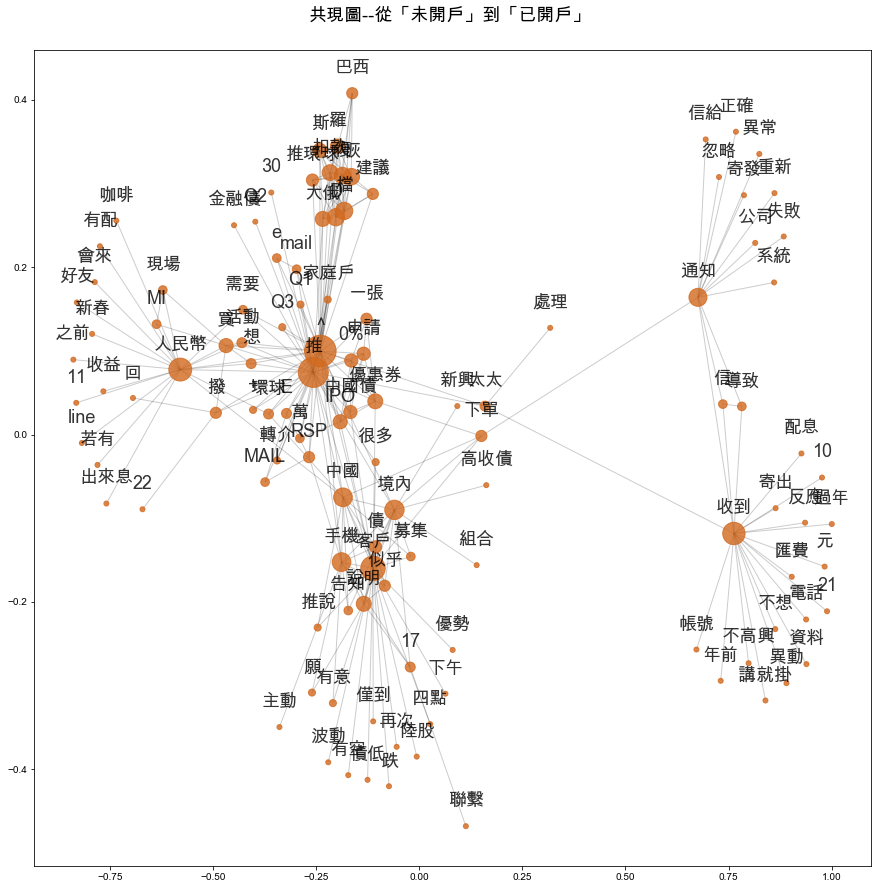

In [119]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']=['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_3)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.suptitle('共現圖--從「未開戶」到「已開戶」',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--從「未開戶」到「已開戶」.png", dpi=100)
plt.show()

「未開戶」經聯絡後還是「未開戶」

In [120]:
no_no_acc = []
for i in range(len(testdata_1['Unique ID'])):
    for j in range(len(no_acc)):
        if(no_acc[j][0] == testdata_1['Unique ID'][i]):
            for k in range(1, no_acc[j][2]+1):
                no_no_acc.append(testdata_1['第'+str(k)+'次通話紀錄'][i])
no_no_acc

['推Q1^',
 '家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬^',
 '想買全球短期收益 覺得美金計價有6%收益很讚\xa0',
 '推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論^',
 "推Q1，朋友 288874 李's介紹，台幣台新無外幣，要特別看能源，NN(L)能源，買股票比較多，比較有興趣是台運^",
 '推Q1，新戶 想買台運，有持有個股，開戶文件有收到，但是還沒空寫，請客戶先寄回\xa0^',
 'RSP，推境內外開戶，台外幣國泰，以為IPO四年債可以用每個月來扣，要零手續費，所以改要買RSP^',
 '推Q1，317305劉O滿介紹的朋友，在南山人壽上班，想要買亞債，想要加入公司的line，寄書面請客戶加入\xa0^',
 '文件有收到，還沒看，客戶表示在忙，有需要再和我們說',
 'IPO四年期，寄書面至通訊，美元',
 'Stock Q 看到4年期,10:22進線詢問,PASS M\xa0',
 '要和先生討論一下，先生比較沒有興趣 推IPO四年期^',
 '轉介-vivian，推Q1 四年期債IPO，人民幣5萬，代姐姐問，人民幣是姐姐才有，不知道姐姐人民幣在哪一家銀行，先寄資料給客戶^',
 '姐姐是王O屏 弟弟會幫客戶寄開戶，若收到開戶代表姐姐要買這一支基金，就可以問姐姐要買多少錢。建議姐姐買人民幣累績\xa0',
 '家庭戶 推四年期債IPO^',
 '推Q1，新戶，款*2^',
 '推Q1，推IPO四年期美金 ，NN(L)新興市場債^',
 'im\xa0 款台外 想買高配息債券 推nnl新興市場債 轉介559 中信台外幣^',
 '推Q1，轉介-idris^',
 '在忙，再和客戶說IPO，推Q1 四年期債^',
 'i轉介 美元\xa0 ipo 第一天經理費 扣1.5%',
 '推IPO 208^',
 '有告知可以去收開戶',
 '[ECP]不投資',
 '推Q1，家庭戶 兒子 244968張O翔的爸爸，建議自己也可以開戶，用外幣來做一些規劃^',
 '[ECP]CDD確認ok ，推Q2，暫時不需要',
 '聯邦銀,NNy債,推EC,寄表單,提供9家外幣銀行參考 ,PASS M^',
 '在永豐台外幣，在永豐有開戶，推Q1，推境內外開戶 pass idris^',
 '559',
 '家

In [121]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []  
for i in range(len(no_no_acc)):
    try:
        poss_3 = jieba.cut(no_no_acc[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss_3:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                relationships_freq_3[w] = {}
    except:
        pass

In [122]:
term_dic_3 = dict()
for sentence in lineNames_freq_3:
    for term in sentence:
        if term not in term_dic_3:
            term_dic_3[term] = {}

In [123]:
for i in range(len(lineNames_freq_3)):
    for term1 in term_dic_3:
        num = 0
        for term2 in lineNames_freq_3[i]:
            if term1 == term2:
                num += 1
        term_dic_3[term1][no_no_acc[i]] = num

In [124]:
TDM_freq_3 = pd.DataFrame.from_dict(term_dic_3)
TDM_freq_3

,推,Q1,^,家庭戶,永豐,李,哲,IPO,四年期,人民幣,...,元大,扣款,全國性,及款,附給,工作,不定期,明年,Robo,併
208 娘298803廖○霞,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50多歲，也在準備退休規劃，天下雜誌上班，200萬台幣在台北富邦，3萬美金在玉山，可以用書面，推GSD及亞太新興債，RSP環球、中國，也可以用美金及人民幣^,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@line好友留名單拿7-11咖啡，對能源比較有興趣，RSP，推Q1，績極^,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@line好友留名單拿7-11咖啡，用華南或是富邦，用款項，推Q1，再看看^,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IPO四年期，寄書面至通訊，美元,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
"LINE好友 在銀行買NN環高有抱怨績效不好 有作中A股 單筆套RSP有打平, 推 Q1 OK^",1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINE好友/基富通/ 推環球有機會 有說RSP 0有中^,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Line@留名單送7-11咖啡活動，推Q1，中信，pass idris^,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M PASS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
names_freq_3 = {}          
relationships_freq_3 = {}  
lineNames_freq_3 = []    

for i in range(len(no_no_acc)):
    try:
        poss = jieba.cut(no_no_acc[i], cut_all = False)
        lineNames_freq_3.append([])
        for w in poss:
            if w not in stopwords:
                lineNames_freq_3[-1].append(w)        
            if names_freq_3.get(w) is None and w not in stopwords:
                names_freq_3[w] = 0
                relationships_freq_3[w] = {}
                names_freq_3[w] += 1   
    except:
        pass

for line in lineNames_freq_3:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships_freq_3[name1].get(name2) is None:     
                relationships_freq_3[name1][name2]= 1
            else:
                relationships_freq_3[name1][name2] = relationships_freq_3[name1][name2]+ 1       
co_occur_freq_3 = [[name, v, w] for name, edges in relationships_freq_3.items() for v, w in edges.items() if w > 4]

In [126]:
np.random.shuffle(co_occur_freq_3)
temp_matrix_3 = pd.DataFrame()
for i in co_occur_freq_3:
    temp_matrix_3.at[i[0], i[1]] = i[2]
co_occurrence_matrix_freq_3 = pd.DataFrame()
for i in temp_matrix_3:
    for j in temp_matrix_3:
        co_occurrence_matrix_freq_3.at[i, j] = temp_matrix_3.at[i, j]
co_occurrence_matrix_freq_3

,推,EC,永豐,想,line,環球,買,^,比較,寄回,...,推環球,能源,月,銀行,家庭戶,pass,華南,詢問,富邦,追蹤
推,NaN,6.0,6.0,7.0,6.0,5.0,19.0,61.0,6.0,9.0,...,NaN,NaN,6.0,5.0,6.0,5.0,5.0,5.0,NaN,NaN
EC,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
永豐,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
想,7.0,NaN,NaN,NaN,NaN,NaN,10.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
line,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
環球,5.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
買,19.0,NaN,NaN,10.0,NaN,NaN,NaN,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
^,61.0,NaN,NaN,8.0,6.0,6.0,15.0,NaN,6.0,8.0,...,7.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,5.0,NaN
比較,6.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
寄回,9.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_3 = [i[2] for i in co_occur_freq_3]
co_occur_sig_3 = []
for i in co_occur_freq_3:
    co_occur_sig_3.append([i[0], i[1], sigmoid((i[2] - np.mean(count_3))/np.std(count_3))])

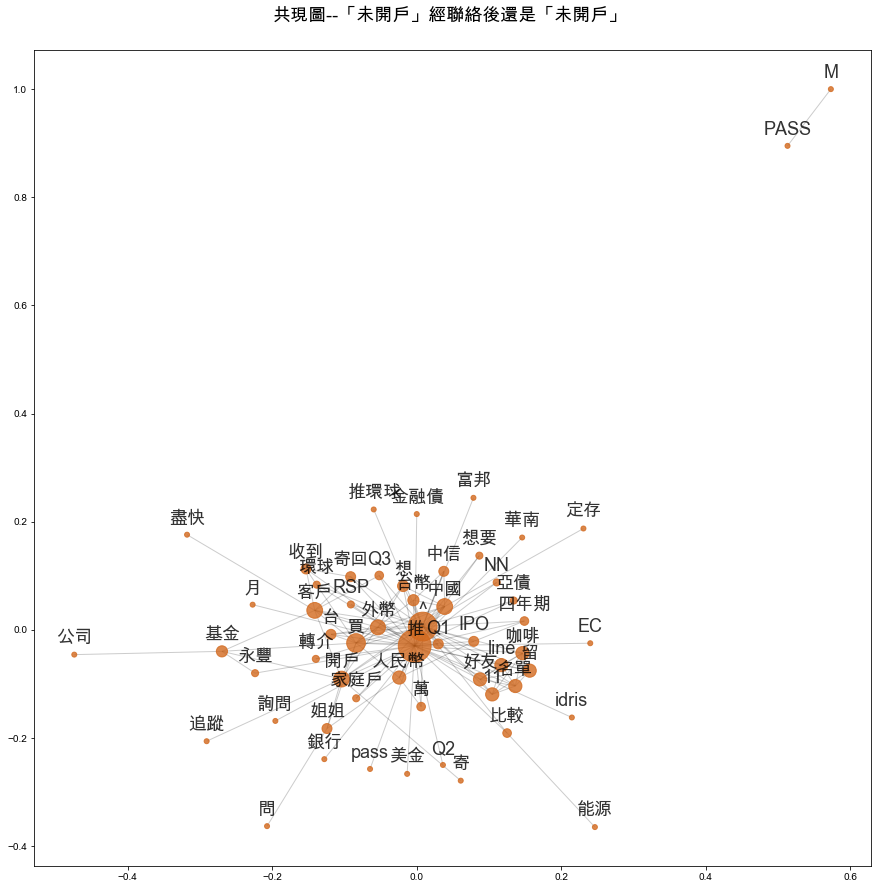

In [128]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']=['Arial Unicode MS']
#plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_sig_3)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#D2691E')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 18, font_family='sans-serif', alpha=0.8)
plt.suptitle('共現圖--「未開戶」經聯絡後還是「未開戶」',x = 0.51,y=0.92, fontsize=18)
plt.savefig("共現圖--「未開戶」經聯絡後還是「未開戶」.png", dpi=100)
plt.show()